In [4]:
'''Informacion:

Detalles:  Recorte de los primeros 6 meses en Temas de Agresion Sexual durante los ultimos 10 a;os aproximadamente en Mexico

Cambios a nivel general:

        - Cambio en el nombre de las columnas, no tenian nombre.
        
        - Revision de NULL / NAN values ,
        
        - Se modificaron los nombres de algunos estados, por que no podrian ser intepretados; Al igual que las columnas, aparentemente fue por el uso de acentuacion.
        
        - Pivotaje de las columas mes, para hacer data a lo largo, en lugar de a lo ancho...
        
        - validacion de valores duplicados 
        
'''

'Informacion:\n\nDetalles:  Recorte de los primeros 6 meses en Temas de Agresion Sexual durante los ultimos 10 a;os aproximadamente en Mexico\n\nCambios a nivel general:\n\n        - Cambio en el nombre de las columnas, no tenian nombre.\n        \n        - Revision de NULL / NAN values ,\n        \n        - Se modificaron los nombres de algunos estados, por que no podrian ser intepretados; Al igual que las columnas, aparentemente fue por el uso de acentuacion.\n        \n        - Pivotaje de las columas mes, para hacer data a lo largo, en lugar de a lo ancho...\n        \n        - validacion de valores duplicados \n        \n'

In [5]:
# import libraries to work
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


#include ne_ss2
# inlude more cases



# Limpieza de Datos:

In [6]:
df_sex_agreson = pd.read_csv('Sexual_Agression.csv')

In [7]:
df_sex_agreson.shape

(1727, 11)

In [8]:
df_sex_agreson.head(10)

2015     Puebla                                       Abuso sexual  \
0  2015     Puebla                                       Acoso sexual   
1  2015     Puebla                               Hostigamiento sexual   
2  2015     Puebla                                   Violaci�n simple   
3  2015     Puebla                               Violaci�n equiparada   
4  2015     Puebla  Otros delitos que atentan contra la libertad y...   
5  2015  Queretaro                                       Abuso sexual   
6  2015  Queretaro                                       Acoso sexual   
7  2015  Queretaro                               Hostigamiento sexual   
8  2015  Queretaro                                   Violaci�n simple   
9  2015  Queretaro                               Violaci�n equiparada   

                                      Abuso sexual.1   0  0.1  0.2  0.3  0.4  \
0                                       Acoso sexual  11    8   11    9   18   
1                               Hostigamiento sexual   1    7    5    5    1   
2                                   Violaci�n simple  43   28   30   27   36   
3                               Violaci�n equiparada   8   11   11   14    7   
4  Otros delitos que atentan contra la libertad y...  49   62   63   83   58   
5                                       Abuso sexual  20   13   14   25   25   
6                                       Acoso sexual   5    1    0    0    3   
7                               Hostigamiento sexual   0    0    0    0    0   
8                                   Violaci�n simple  17   11   30   25   31   
9                               Violaci�n equiparada   1    3    3    2    1   

   0.5  0.6  
0   11    5  
1    3    1  
2   33   44  
3   12    7  
4   77   49  
5   17   21  
6    3    0  
7    0    0  
8   22   29  
9    2    3

In [9]:
#Hay que susituir todos los ?
df_sex_agreson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   2015            1727 non-null   int64 
 1   Puebla          1727 non-null   object
 2   Abuso sexual    1727 non-null   object
 3   Abuso sexual.1  1727 non-null   object
 4   0               1727 non-null   int64 
 5   0.1             1727 non-null   int64 
 6   0.2             1727 non-null   int64 
 7   0.3             1727 non-null   int64 
 8   0.4             1727 non-null   int64 
 9   0.5             1727 non-null   int64 
 10  0.6             1727 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 148.5+ KB


In [10]:
df_sex_agreson.columns
# Los nombres no se exportaron correctamente

Index(['2015', 'Puebla', 'Abuso sexual', 'Abuso sexual.1', '0', '0.1', '0.2',
       '0.3', '0.4', '0.5', '0.6'],
      dtype='object')

In [11]:
#Cambio de el nombre de las columnas, o mejor dicho establecer el nombre de columas
df_sex_agreson.columns = ['A_o', 'Estado', 'Tipo_de_abuso', 'Subtipo_de_Abuso', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio']

In [12]:
df_sex_agreson.head(1)

A_o  Estado Tipo_de_abuso Subtipo_de_Abuso  Enero  Febrero  Marzo  Abril  \
0  2015  Puebla  Acoso sexual     Acoso sexual     11        8     11      9   

   Mayo  Junio  Julio  
0    18     11      5

### Revision de ISNULL - ISNAN

In [13]:
df_sex_agreson.isnull().sum() # cuidado con usar count, ya que cuenta los valores o filas


A_o                 0
Estado              0
Tipo_de_abuso       0
Subtipo_de_Abuso    0
Enero               0
Febrero             0
Marzo               0
Abril               0
Mayo                0
Junio               0
Julio               0
dtype: int64

### Revision de unique values

In [14]:
df_sex_agreson.columns

Index(['A_o', 'Estado', 'Tipo_de_abuso', 'Subtipo_de_Abuso', 'Enero',
       'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio'],
      dtype='object')

#### A:o - Tipo de abuso

In [15]:
df_sex_agreson.A_o.unique()
#df_sex_agreson.A_o.nunique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [16]:
df_sex_agreson.Estado.unique()
#df_sex_agreson.Estado.nunique()

# Recuerda que este fue modificado, en la parte de SQL

array(['Puebla', 'Queretaro', 'Quintana Roo', 'San Luis Potosi',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatan', 'Zacatecas',
       'Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de Mexico', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Mexico', 'Michoacan de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo Leon', 'Oaxaca'], dtype=object)

In [17]:
df_sex_agreson.Tipo_de_abuso.unique()

'''Los siguientes dos deben ser sustituidos, ese � ocasionara errores'''

# Violaci�n simple
#Violaci�n equiparada



'Los siguientes dos deben ser sustituidos, ese � ocasionara errores'

In [18]:
#df_sex_agreson['Tipo_de_abuso'] = df_sex_agreson['Tipo_de_abuso'].str.replace('Violaci�n simple', 'Violacion simple')
#df_sex_agreson['Tipo_de_abuso'] = df_sex_agreson['Tipo_de_abuso'].str.replace('Violaci�n equiparada', 'Violacion equiparada')

df_sex_agreson.Tipo_de_abuso.unique()


array(['Acoso sexual', 'Hostigamiento sexual', 'Violaci�n simple',
       'Violaci�n equiparada',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Abuso sexual'], dtype=object)

#### Subtipo de abuso - Meses

In [19]:
df_sex_agreson['Subtipo_de_Abuso'].unique()
#Violaci�n simple
#Violaci�n equiparada

array(['Acoso sexual', 'Hostigamiento sexual', 'Violaci�n simple',
       'Violaci�n equiparada',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Abuso sexual'], dtype=object)

In [20]:
#df_sex_agreson['Subtipo_de_Abuso'] = df_sex_agreson['Subtipo_de_Abuso'].str.replace('Violaci�n simple', 'Violacion simple')
#df_sex_agreson['Subtipo_de_Abuso'] = df_sex_agreson['Subtipo_de_Abuso'].str.replace('Violaci�n equiparada', 'Violacion equiparada')
df_sex_agreson['Subtipo_de_Abuso'].unique()


array(['Acoso sexual', 'Hostigamiento sexual', 'Violaci�n simple',
       'Violaci�n equiparada',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Abuso sexual'], dtype=object)

In [21]:
#df_sex_agreson['Enero'].unique()
#df_sex_agreson['Febrero'].unique()
#df_sex_agreson['Marzo'].unique()
#df_sex_agreson['Abril'].unique()
#df_sex_agreson['Mayo'].unique()
#df_sex_agreson['Junio'].unique()
#df_sex_agreson['Julio'].unique()

'''Todos mostraron valores acorde con lo esperado (int , valor numerico entre 0 - n)

    -El siguiente caso hay que pensar previamente en lo que es logico primero, para asi ir limpiando de mejor manera nuestros datos
    - Como por ejemplo que no puede haber valores negativos en este set de datos,
    
    
    
'''






'Todos mostraron valores acorde con lo esperado (int , valor numerico entre 0 - n)\n\n    -El siguiente caso hay que pensar previamente en lo que es logico primero, para asi ir limpiando de mejor manera nuestros datos\n    - Como por ejemplo que no puede haber valores negativos en este set de datos,\n    \n    \n    \n'

### Cambio de columnas Ene_Jul de orden

In [22]:
df_sex_agreson = pd.melt(df_sex_agreson, id_vars=['A_o', 'Estado', 'Tipo_de_abuso', 'Subtipo_de_Abuso'], 
                    var_name='Mes', value_name='Valor')


''' Es un pivot visto de otra manera '''

' Es un pivot visto de otra manera '

#

In [23]:
df_sex_agreson.count() 

'''Crecio nuestro dataset, despues del pivot aumento'''

'Crecio nuestro dataset, despues del pivot aumento'

In [24]:
df_sex_agreson.duplicated().sum()

'''Sin duplicados'''

'Sin duplicados'

In [25]:
df_sex_agreson.to_csv('sexual_agre_cleaned.csv', index=False)

'''Exportar nuestro data frame como csv'''

'Exportar nuestro data frame como csv'

# EDA 

###

La meta es entender las principales características, estructuras, relaciones e irregularidades que pueden existir en tu dataset.

📊 Objetivos de un Data Analyst: 

1️⃣ Identificar Patrones: Buscar regularidades en los datos para poder hacer inferencias.

2️⃣ Encontrar Anomalías: Detectar outliers o valores atípicos que podrían sesgar el análisis.

3️⃣ Comprender Relaciones: Ver cómo las variables interactúan entre sí.

4️⃣ Comprobar Supuestos: Antes de aplicar cualquier modelo, necesitas saber si ciertas suposiciones se cumplen.

💎 Componentes del EDA:

1️⃣ Estadísticas Descriptivas: Media, mediana, desviación estándar, etc.

2️⃣ Visualización de Datos: Gráficos de barras, líneas, mapas de calor, scatter plots y más.

3️⃣ Manipulación de Datos: Puede que necesites recodificar variables, tratar valores nulos, etc.

4️⃣ Correlación y Covarianza: Ver cómo las variables están relacionadas entre sí.

5️⃣ Pruebas de Hipótesis: Por si necesitas hacer inferencias estadísticas más formales.

💬 Extras:

1️⃣ Feature Engineering: Crear nuevas variables que podrían facilitar el análisis o el modelado.

2️⃣ Clustering: A veces, los métodos no supervisados como el clustering pueden revelar relaciones ocultas.

###

In [26]:
#df_sex_agreson.describe()
df_sex_agreson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12089 entries, 0 to 12088
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   A_o               12089 non-null  int64 
 1   Estado            12089 non-null  object
 2   Tipo_de_abuso     12089 non-null  object
 3   Subtipo_de_Abuso  12089 non-null  object
 4   Mes               12089 non-null  object
 5   Valor             12089 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 566.8+ KB


In [27]:
df_sex_agreson.head()

A_o  Estado                                      Tipo_de_abuso  \
0  2015  Puebla                                       Acoso sexual   
1  2015  Puebla                               Hostigamiento sexual   
2  2015  Puebla                                   Violaci�n simple   
3  2015  Puebla                               Violaci�n equiparada   
4  2015  Puebla  Otros delitos que atentan contra la libertad y...   

                                    Subtipo_de_Abuso    Mes  Valor  
0                                       Acoso sexual  Enero     11  
1                               Hostigamiento sexual  Enero      1  
2                                   Violaci�n simple  Enero     43  
3                               Violaci�n equiparada  Enero      8  
4  Otros delitos que atentan contra la libertad y...  Enero     49

### Visualizacion general x mes y estado

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5360\1032844915.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_sex_agreson, x='A_o', y='Valor', estimator=sum, ci=None)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5360\1032844915.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_sex_agreson, y='Estado', x='Valor', estimator=sum, ci= None, order = df_sex_agreson.groupby('Estado')['Valor'].sum().sort_values(ascending=False).index)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5360\1032844915.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_sex_agreson, y='Tipo_de_abuso', x='Valor', estimator=sum, ci= None, order = df_sex_agreson.groupby('Tipo_de_abuso')['Valor'].sum().sort_values(ascending=False).index)
C:\Users\Public\Documents\Won

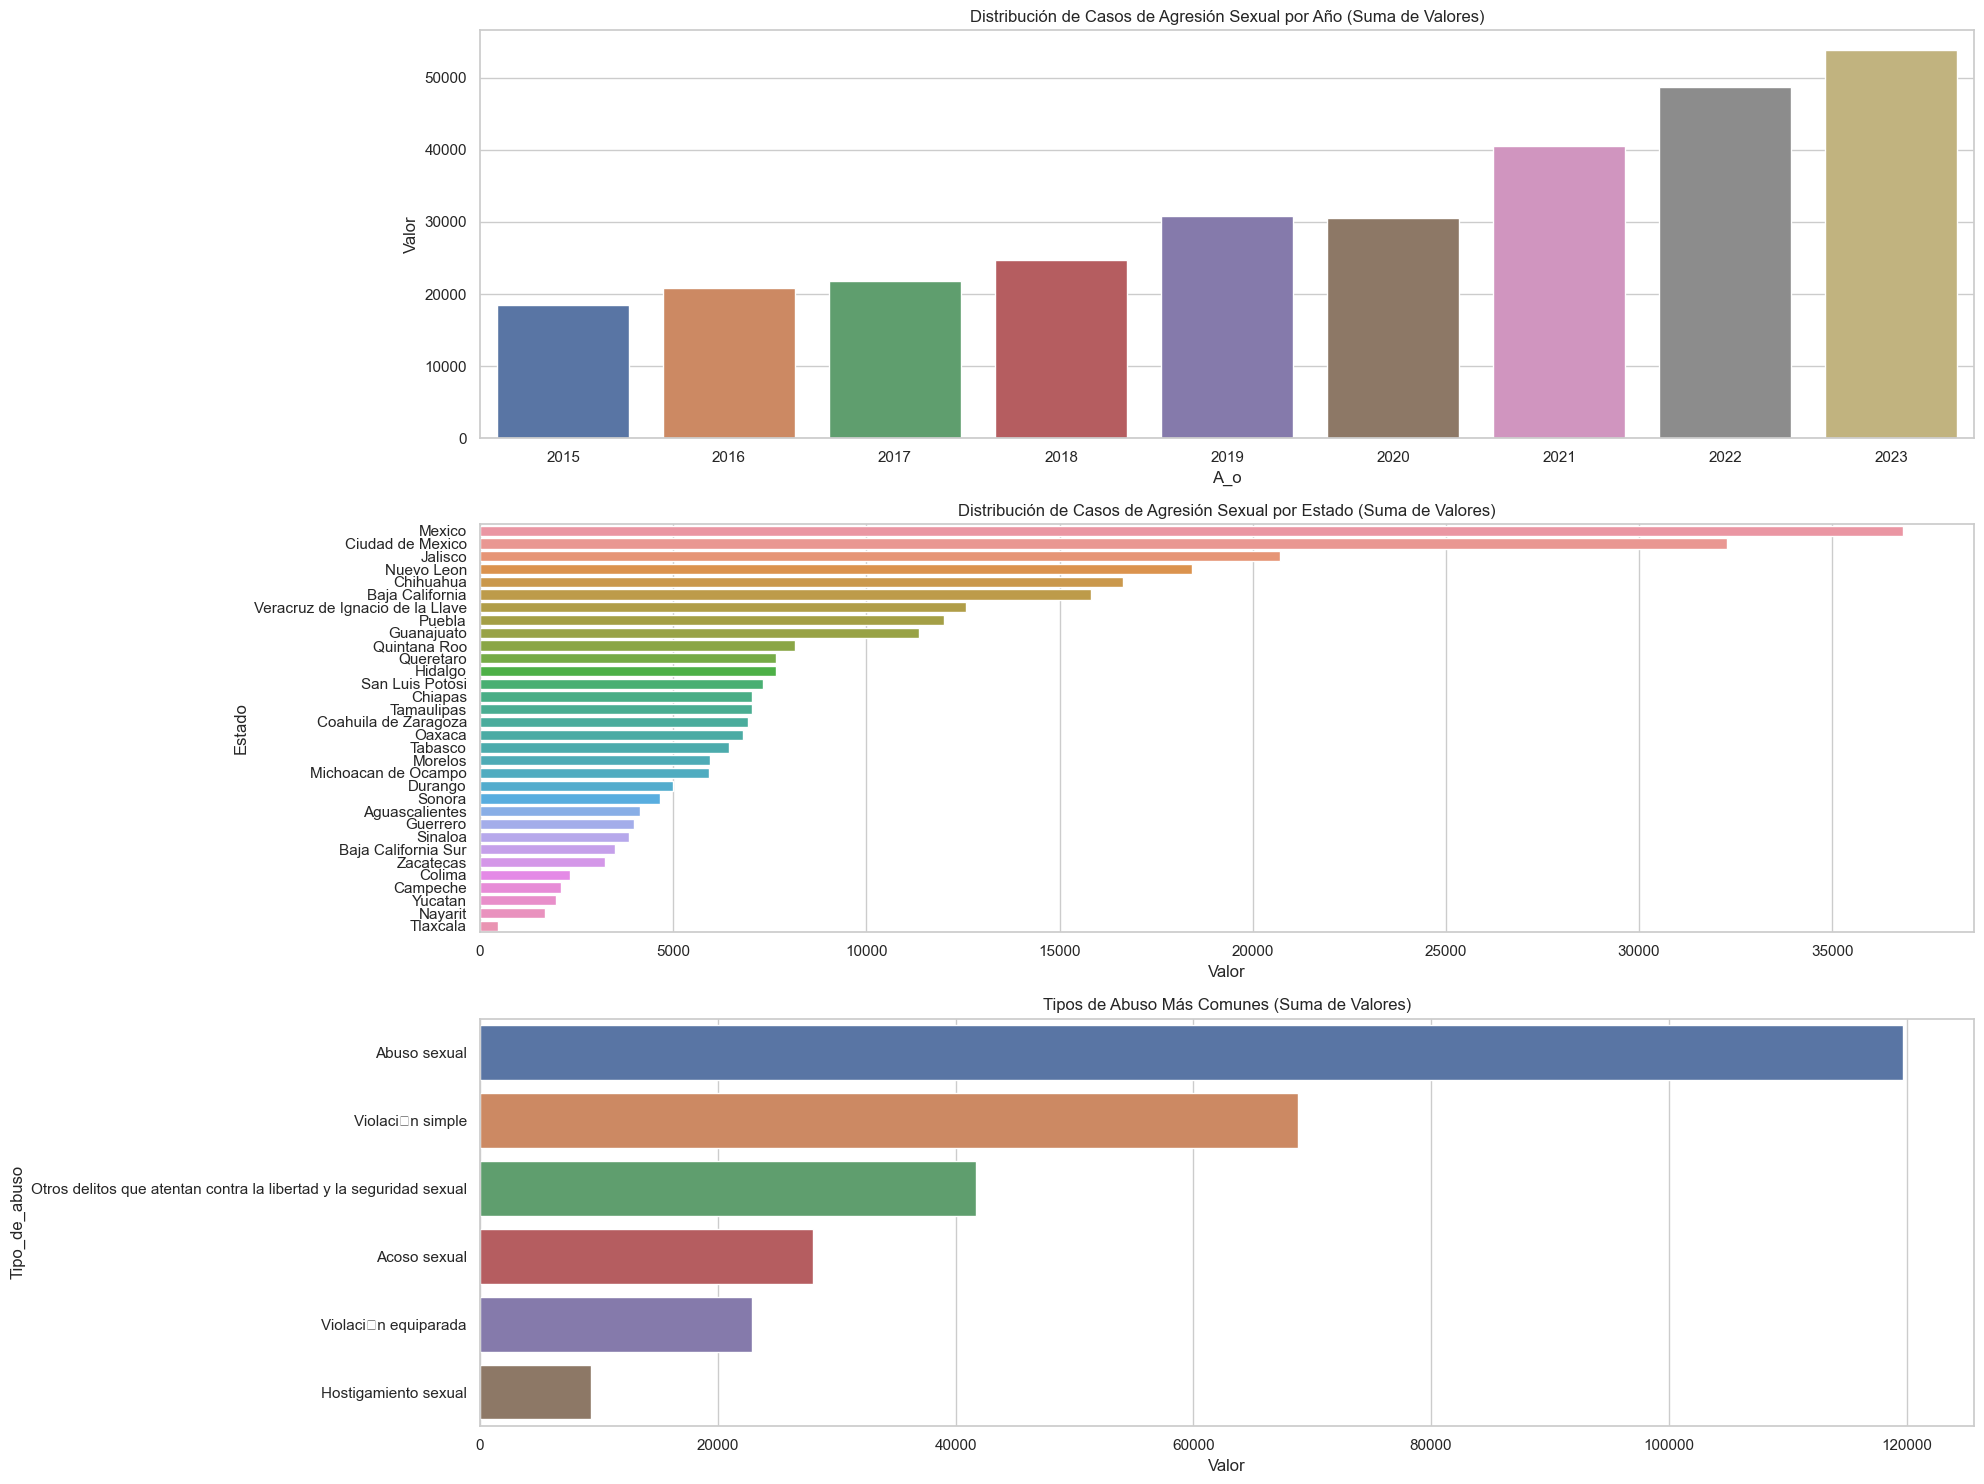

In [28]:

# Configurar el estilo estético de las gráficas con Seaborn
sns.set_theme(style="whitegrid")

# Inicializar la figura donde se mostrarán las gráficas
# Establecemos el tamaño de la figura en 20x15
plt.figure(figsize=(20, 15))

# Crear un subplot para la primera gráfica
# El primer número '3' indica que habrá 3 filas de gráficos
# El segundo número '1' indica que habrá 1 columna de gráficos
# El tercer número '1' indica que este es el primer gráfico
plt.subplot(3, 1, 1)

# Crear un gráfico de barras para mostrar la distribución por año
# 'data=df' especifica el DataFrame que estamos usando
# 'x='A_o'' y 'y='Valor'' especifican las columnas del DataFrame que se usarán para el eje x e y, respectivamente
# 'estimator=sum' indica que queremos sumar los valores para cada categoría, en lugar de contarlos
# 'ci=None' elimina el intervalo de confianza que Seaborn muestra por defecto
sns.barplot(data=df_sex_agreson, x='A_o', y='Valor', estimator=sum, ci=None)

# Añadir un título a la gráfica
plt.title('Distribución de Casos de Agresión Sexual por Año (Suma de Valores)')

# Crear un segundo subplot para la segunda gráfica
plt.subplot(3, 1, 2)

# Crear un gráfico de barras para mostrar la distribución por estado
# 'order' nos permite ordenar las barras según la suma de 'Valor' para cada estado
# df.groupby('Estado'): Agrupa el DataFrame por la columna Estado. Esto nos da un nuevo objeto agrupado donde todas las filas con el mismo estado se agrupan juntas.
# ['Valor'].sum(): Selecciona la columna Valor del objeto agrupado y suma los valores para cada grupo (en este caso, cada estado).
# sort_values(ascending=False): Ordena los valores sumados en orden descendente (el más grande primero).
# .index: Obtiene los índices de los valores ordenados, que en este caso son los nombres de los estados.

sns.barplot(data=df_sex_agreson, y='Estado', x='Valor', estimator=sum, ci= None, order = df_sex_agreson.groupby('Estado')['Valor'].sum().sort_values(ascending=False).index)

# Añadir un título a la gráfica
plt.title('Distribución de Casos de Agresión Sexual por Estado (Suma de Valores)')

# Crear un tercer subplot para la tercera gráfica
plt.subplot(3, 1, 3)

# Crear un gráfico de barras para mostrar los tipos de abuso más comunes
# 'order' nos permite ordenar las barras según la suma de 'Valor' para cada tipo de abuso
sns.barplot(data=df_sex_agreson, y='Tipo_de_abuso', x='Valor', estimator=sum, ci= None, order = df_sex_agreson.groupby('Tipo_de_abuso')['Valor'].sum().sort_values(ascending=False).index)

# Añadir un título a la gráfica
plt.title('Tipos de Abuso Más Comunes (Suma de Valores)')

# Ajustar el layout para que todo encaje bien
plt.tight_layout()

# Mostrar todas las gráficas
plt.show()


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5360\3310630256.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Mes', y='Valor', estimator=sum, ci=None, order=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])


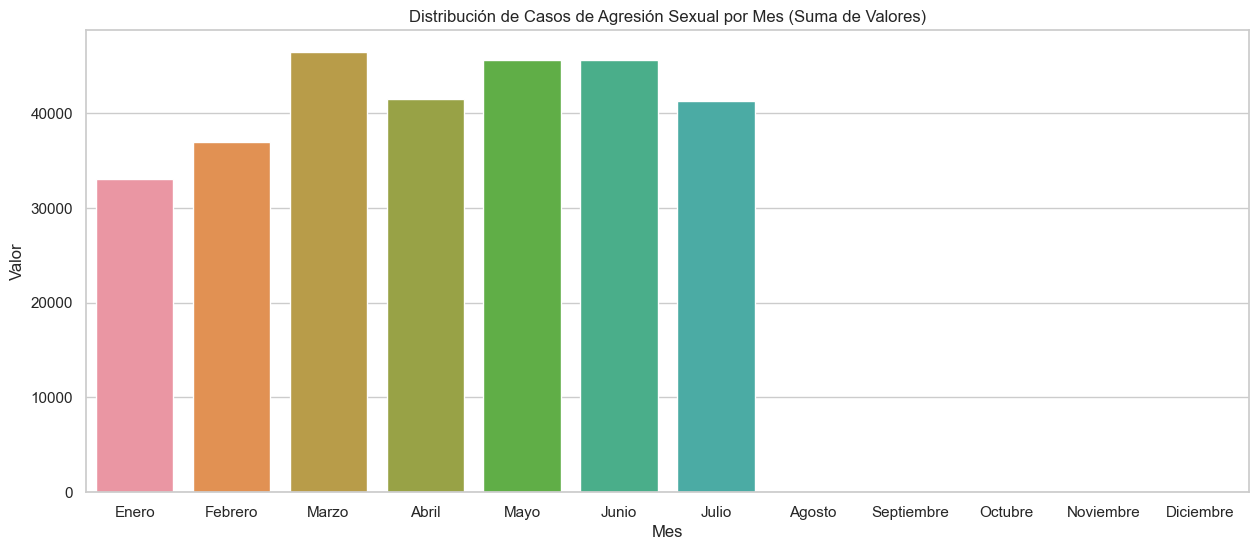

In [29]:
# Re-importar las bibliotecas necesarias
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Re-cargar el dataset desde el archivo
df =df_sex_agreson

# Inicializar la figura donde se mostrará el gráfico
# Establecemos el tamaño de la figura en 15x6
plt.figure(figsize=(15, 6))

# Crear un gráfico de barras para mostrar la distribución por mes
# 'data=df' especifica el DataFrame que estamos usando
# 'x='Mes'' y 'y='Valor'' especifican las columnas del DataFrame que se usarán para el eje x e y, respectivamente
# 'estimator=sum' indica que queremos sumar los valores para cada categoría (mes), en lugar de contarlos
# 'ci=None' elimina el intervalo de confianza que Seaborn muestra por defecto
# 'order=[...]' especifica el orden en el que queremos que aparezcan los meses
sns.barplot(data=df, x='Mes', y='Valor', estimator=sum, ci=None, order=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])

# Añadir un título al gráfico
plt.title('Distribución de Casos de Agresión Sexual por Mes (Suma de Valores)')

# Mostrar el gráfico
plt.show()


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5360\2885836441.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_year, x='Mes', y='Valor', estimator=sum, ci=None, ax=ax, order=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5360\2885836441.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_year, x='Mes', y='Valor', estimator=sum, ci=None, ax=ax, order=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5360\2885836441.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_year, x='Mes', y='Valor', 

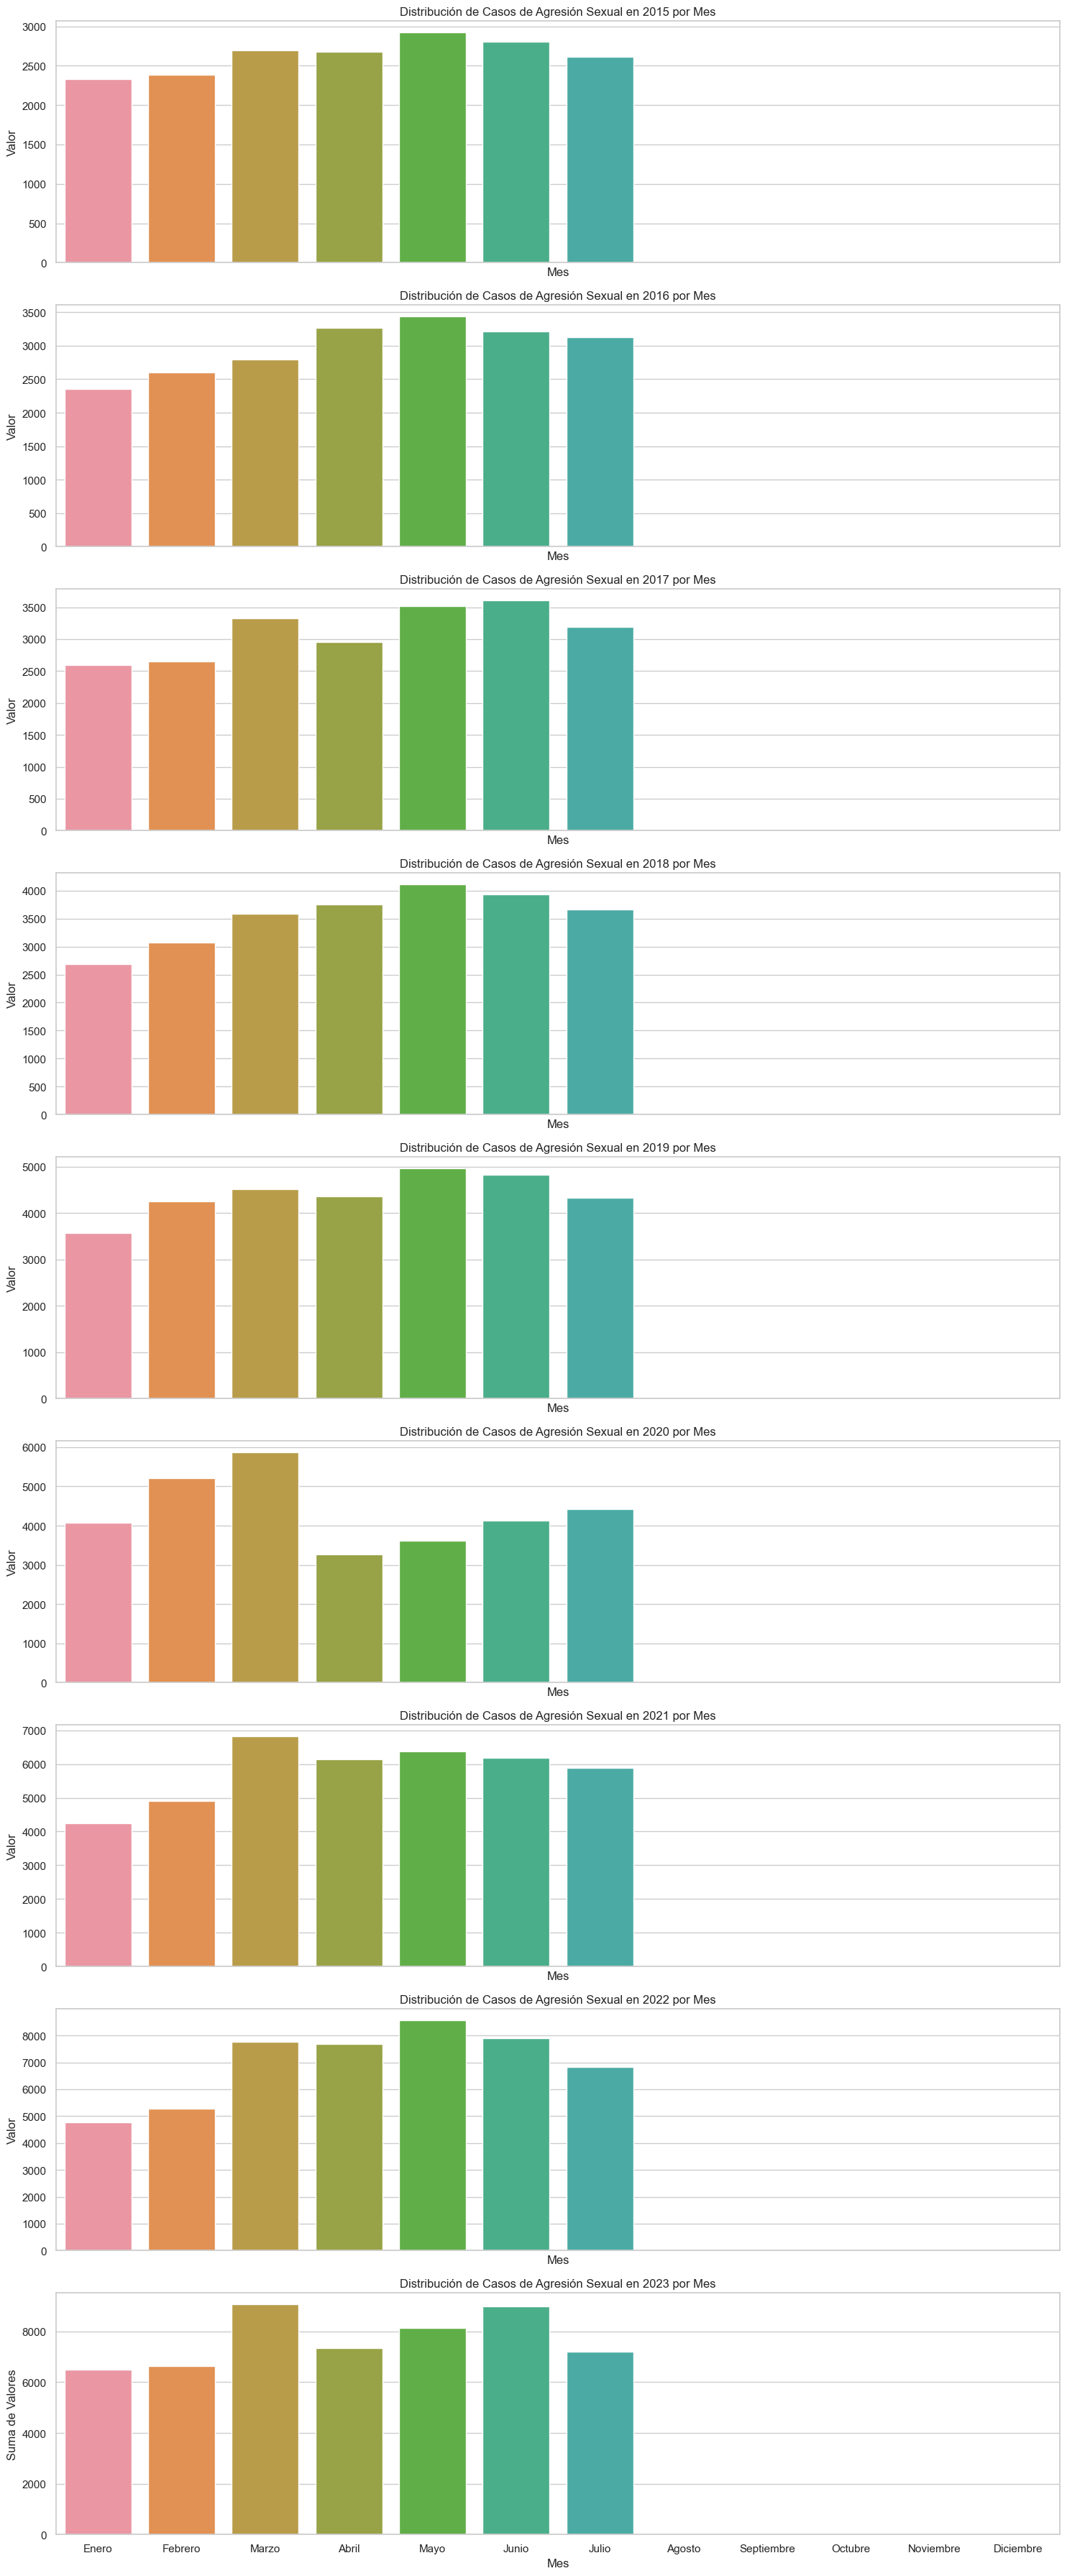

In [30]:
# Inicializar la figura con subplots, uno para cada año
# Obtenemos los años únicos en el dataset y contamos cuántos hay
years = df['A_o'].unique()
n_years = len(years)

# Creamos una figura y ejes (subplots) con la misma escala en el eje x
fig, axes = plt.subplots(n_years, 1, figsize=(15, 4 * n_years), sharex=True)

# Recorremos cada año y creamos un subplot
for i, year in enumerate(sorted(years)):
    ax = axes[i]  # Obtenemos el eje correspondiente
    df_year = df[df['A_o'] == year]  # Filtramos el DataFrame para incluir sólo los datos del año actual
    
    # Creamos un gráfico de barras en el eje correspondiente
    sns.barplot(data=df_year, x='Mes', y='Valor', estimator=sum, ci=None, ax=ax, order=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
    
    # Añadimos un título al subplot
    ax.set_title(f'Distribución de Casos de Agresión Sexual en {year} por Mes')

# Añadimos etiquetas comunes para los ejes x e y
plt.xlabel('Mes')
plt.ylabel('Suma de Valores')

# Ajustamos el layout para que todo encaje bien
plt.tight_layout()

# Mostramos los gráficos
plt.show()

### Tendecia por a;o


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5360\1717891488.py:28: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  plt.tight_layout()
C:\Users\Edgar\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


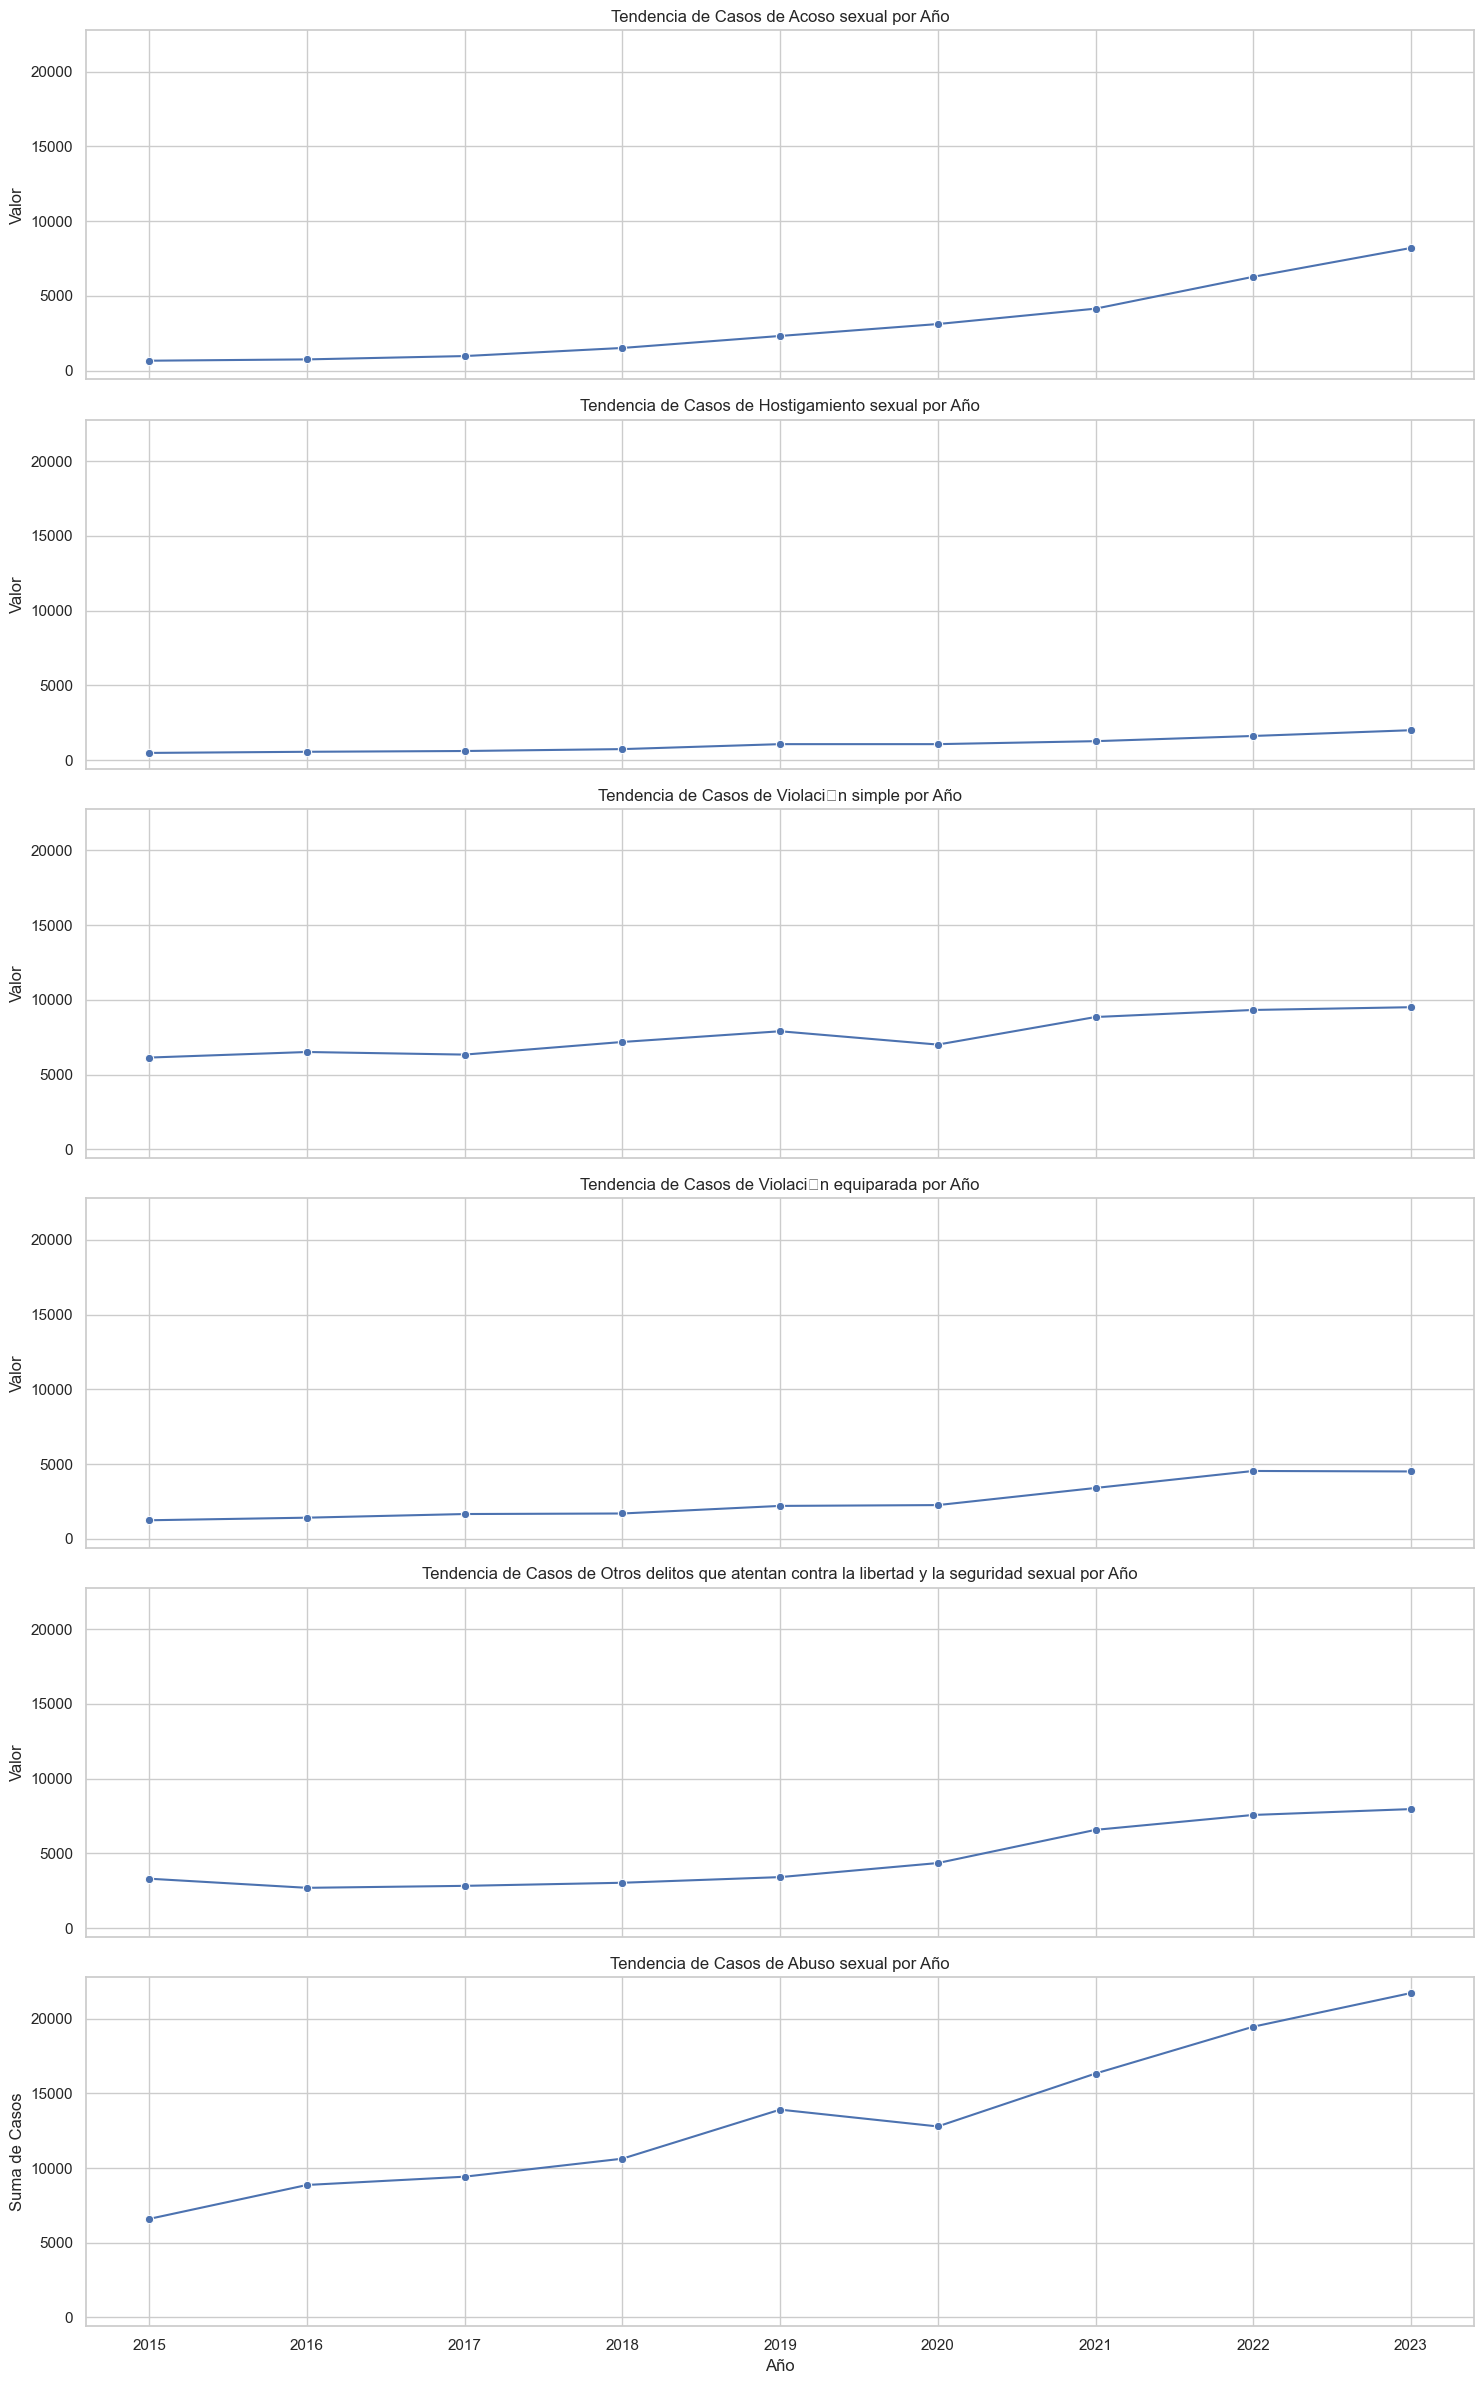

In [31]:
# Obtener los tipos únicos de abuso del conjunto de datos y almacenarlos en la variable 'abuse_types'
abuse_types = df['Tipo_de_abuso'].unique()

# Inicializar una figura que contendrá varios subgráficos (uno para cada tipo de abuso)
# El número de subgráficos es igual al número de tipos de abuso únicos
fig, axes = plt.subplots(len(abuse_types), 1, figsize=(15, 4 * len(abuse_types)), sharex=True, sharey=True)

# Iniciar un bucle para crear un subgráfico para cada tipo de abuso
for i, abuse_type in enumerate(abuse_types):
    # Seleccionar el subplot correspondiente
    ax = axes[i]
    
    # Filtrar el conjunto de datos para incluir sólo los registros del tipo de abuso actual
    df_abuse = df[df['Tipo_de_abuso'] == abuse_type]
    
    # Crear un gráfico de línea en el subplot actual
    # La suma de la columna 'Valor' se utiliza como valor y para ello se establece estimator=sum
    sns.lineplot(data=df_abuse, x='A_o', y='Valor', estimator=sum, errorbar=None, marker='o', ax=ax)
    
    # Añadir un título al subplot
    ax.set_title(f'Tendencia de Casos de {abuse_type} por Año')

# Añadir etiquetas comunes para los ejes x e y
plt.xlabel('Año')
plt.ylabel('Suma de Casos')

# Ajustar el diseño para que todo encaje y se muestre correctamente
plt.tight_layout()

# Mostrar todos los subgráficos
plt.show()


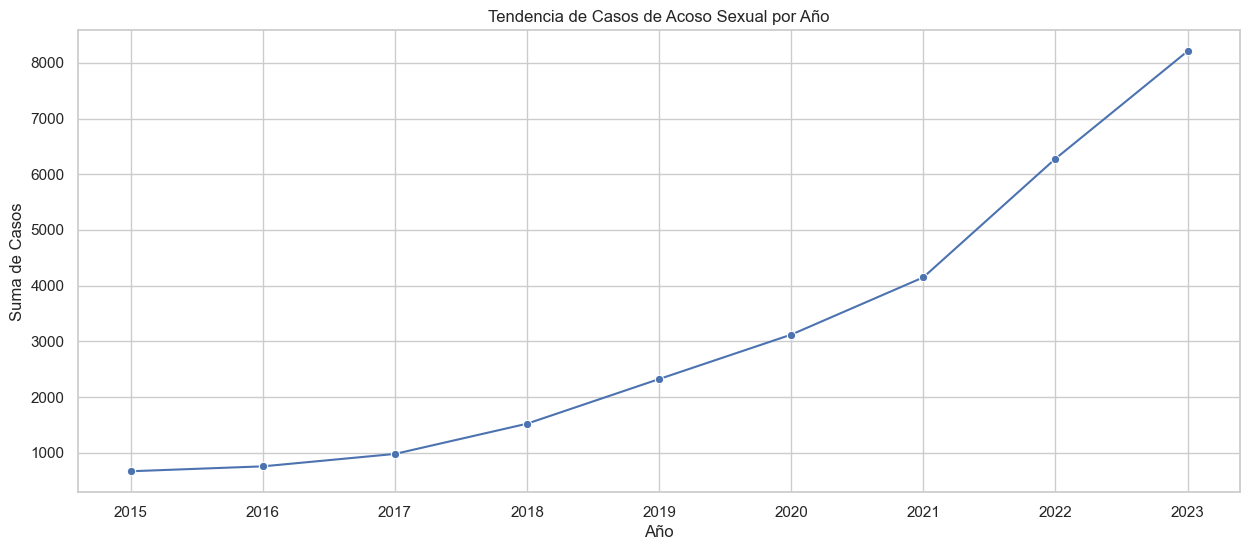

In [32]:
# Filtrar el conjunto de datos para incluir solo registros donde el tipo de abuso es "Acoso Sexual"
df_acoso_sexual = df[df['Tipo_de_abuso'] == 'Acoso sexual']

# Inicializar la figura
plt.figure(figsize=(15, 6))

# Crear un gráfico de línea para mostrar la tendencia de los casos de "Acoso Sexual" a lo largo de los años
sns.lineplot(data=df_acoso_sexual, x='A_o', y='Valor', estimator=sum, errorbar=None, marker='o')

# Añadir título y etiquetas
plt.title('Tendencia de Casos de Acoso Sexual por Año')
plt.xlabel('Año')
plt.ylabel('Suma de Casos')

# Mostrar el gráfico
plt.show()


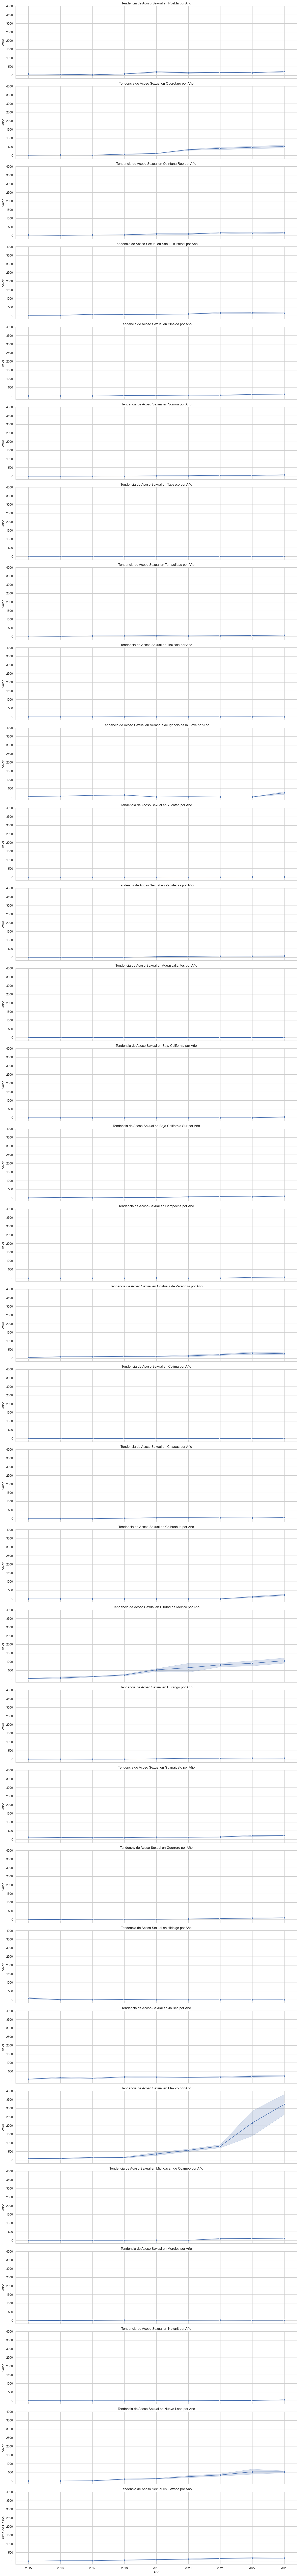

In [33]:
# Initialize the figure with subplots, one for each state
unique_states = df['Estado'].unique()


fig, axes = plt.subplots(len(unique_states), 1, figsize=(15, 4 * len(unique_states)), sharex=True, sharey=True)

# Loop through each state and create a subplot
for i, state in enumerate(unique_states):
    ax = axes[i]
    df_state = df_acoso_sexual[df_acoso_sexual['Estado'] == state]
    sns.lineplot(data=df_state, x='A_o', y='Valor', estimator=sum, marker='o', ax=ax)
    ax.set_title(f'Tendencia de Acoso Sexual en {state} por Año')

# Add common x and y labels
plt.xlabel('Año')
plt.ylabel('Suma de Casos')

# Show the graphs
plt.tight_layout()
plt.show()

In [34]:
df_sex_agreson['Estado'].unique()

array(['Puebla', 'Queretaro', 'Quintana Roo', 'San Luis Potosi',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatan', 'Zacatecas',
       'Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de Mexico', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Mexico', 'Michoacan de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo Leon', 'Oaxaca'], dtype=object)

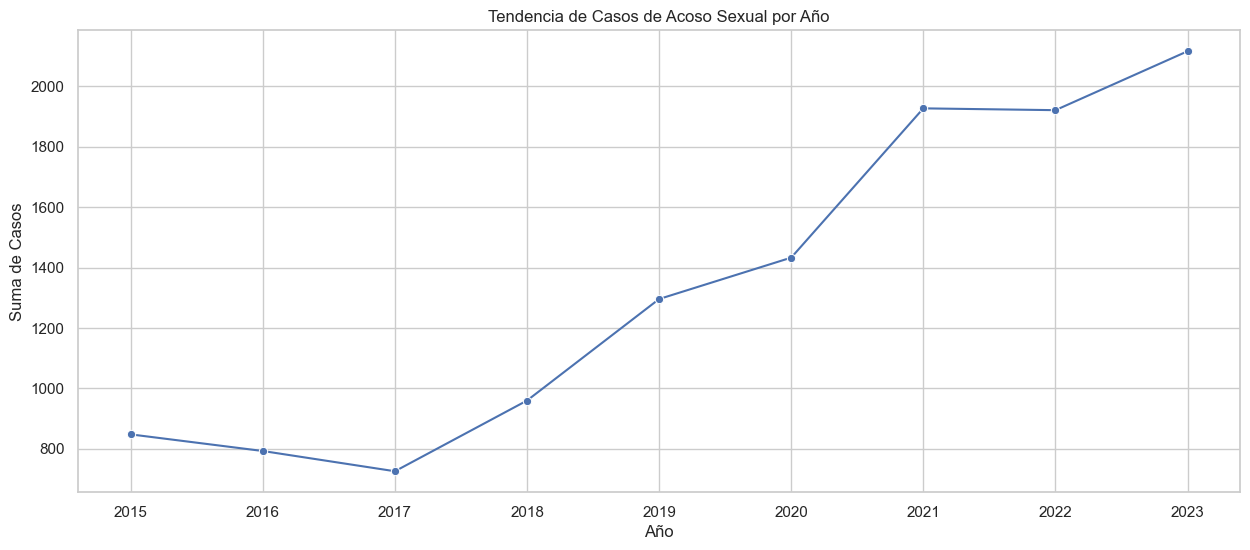

In [35]:
# Filtrar el conjunto de datos para incluir solo registros donde el tipo de abuso es "Acoso Sexual"
df_guanajuato = df[df['Estado'] == 'Puebla']

# Inicializar la figura
plt.figure(figsize=(15, 6))

# Crear un gráfico de línea para mostrar la tendencia de los casos de "Acoso Sexual" a lo largo de los años
sns.lineplot(data=df_guanajuato, x='A_o', y='Valor', estimator=sum, errorbar=None, marker='o')

# Añadir título y etiquetas
plt.title('Tendencia de Casos de Acoso Sexual por Año')
plt.xlabel('Año')
plt.ylabel('Suma de Casos')

# Mostrar el gráfico
plt.show()

### EDA RESUMIDA

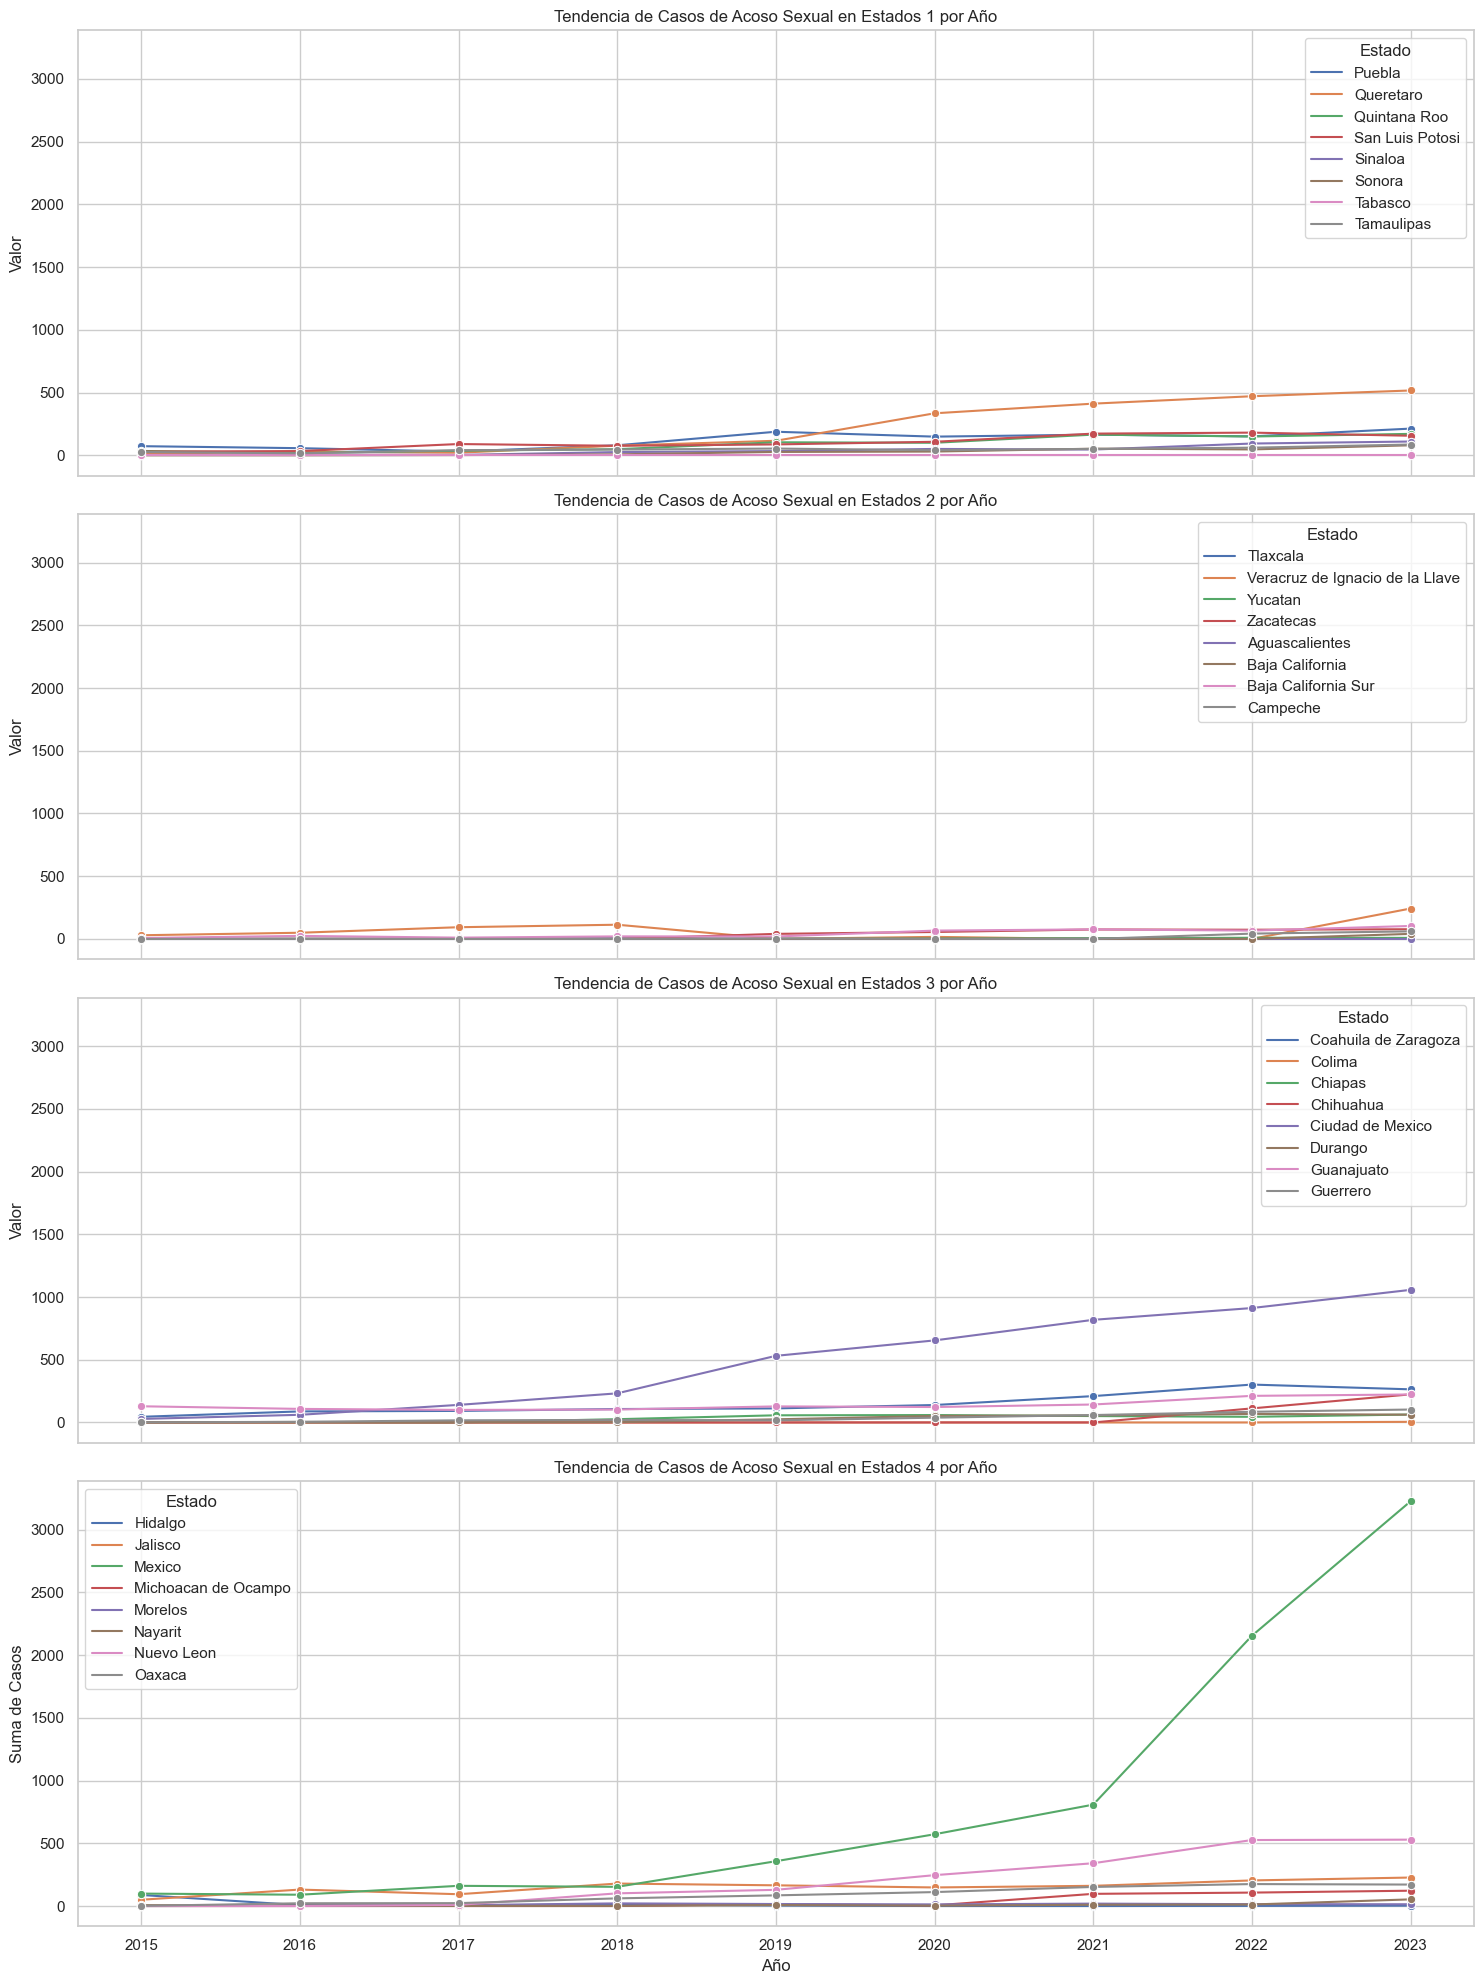

In [36]:
states = df_sex_agreson['Estado'].unique()
# Initialize the figure with 4 subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 20), sharex=True, sharey=True)

# Divide the states into 4 groups of 8
states_grouped = [states[i:i + 8] for i in range(0, len(states), 8)]

# Loop through each group of states and create a subplot
for i, states_subset in enumerate(states_grouped):
    ax = axes[i]
    
    # Filter the data to include only the states in the current subset
    df_states_subset = df_acoso_sexual[df_acoso_sexual['Estado'].isin(states_subset)]
    
    # Create a lineplot on the current subplot
    sns.lineplot(data=df_states_subset, x='A_o', y='Valor', hue='Estado', estimator=sum, errorbar=None, marker='o', ax=ax)
    
    # Add a title to the subplot
    ax.set_title(f'Tendencia de Casos de Acoso Sexual en Estados {i+1} por Año')

# Add common x and y labels
plt.xlabel('Año')
plt.ylabel('Suma de Casos')

# Show the graphs
plt.tight_layout()
plt.show()


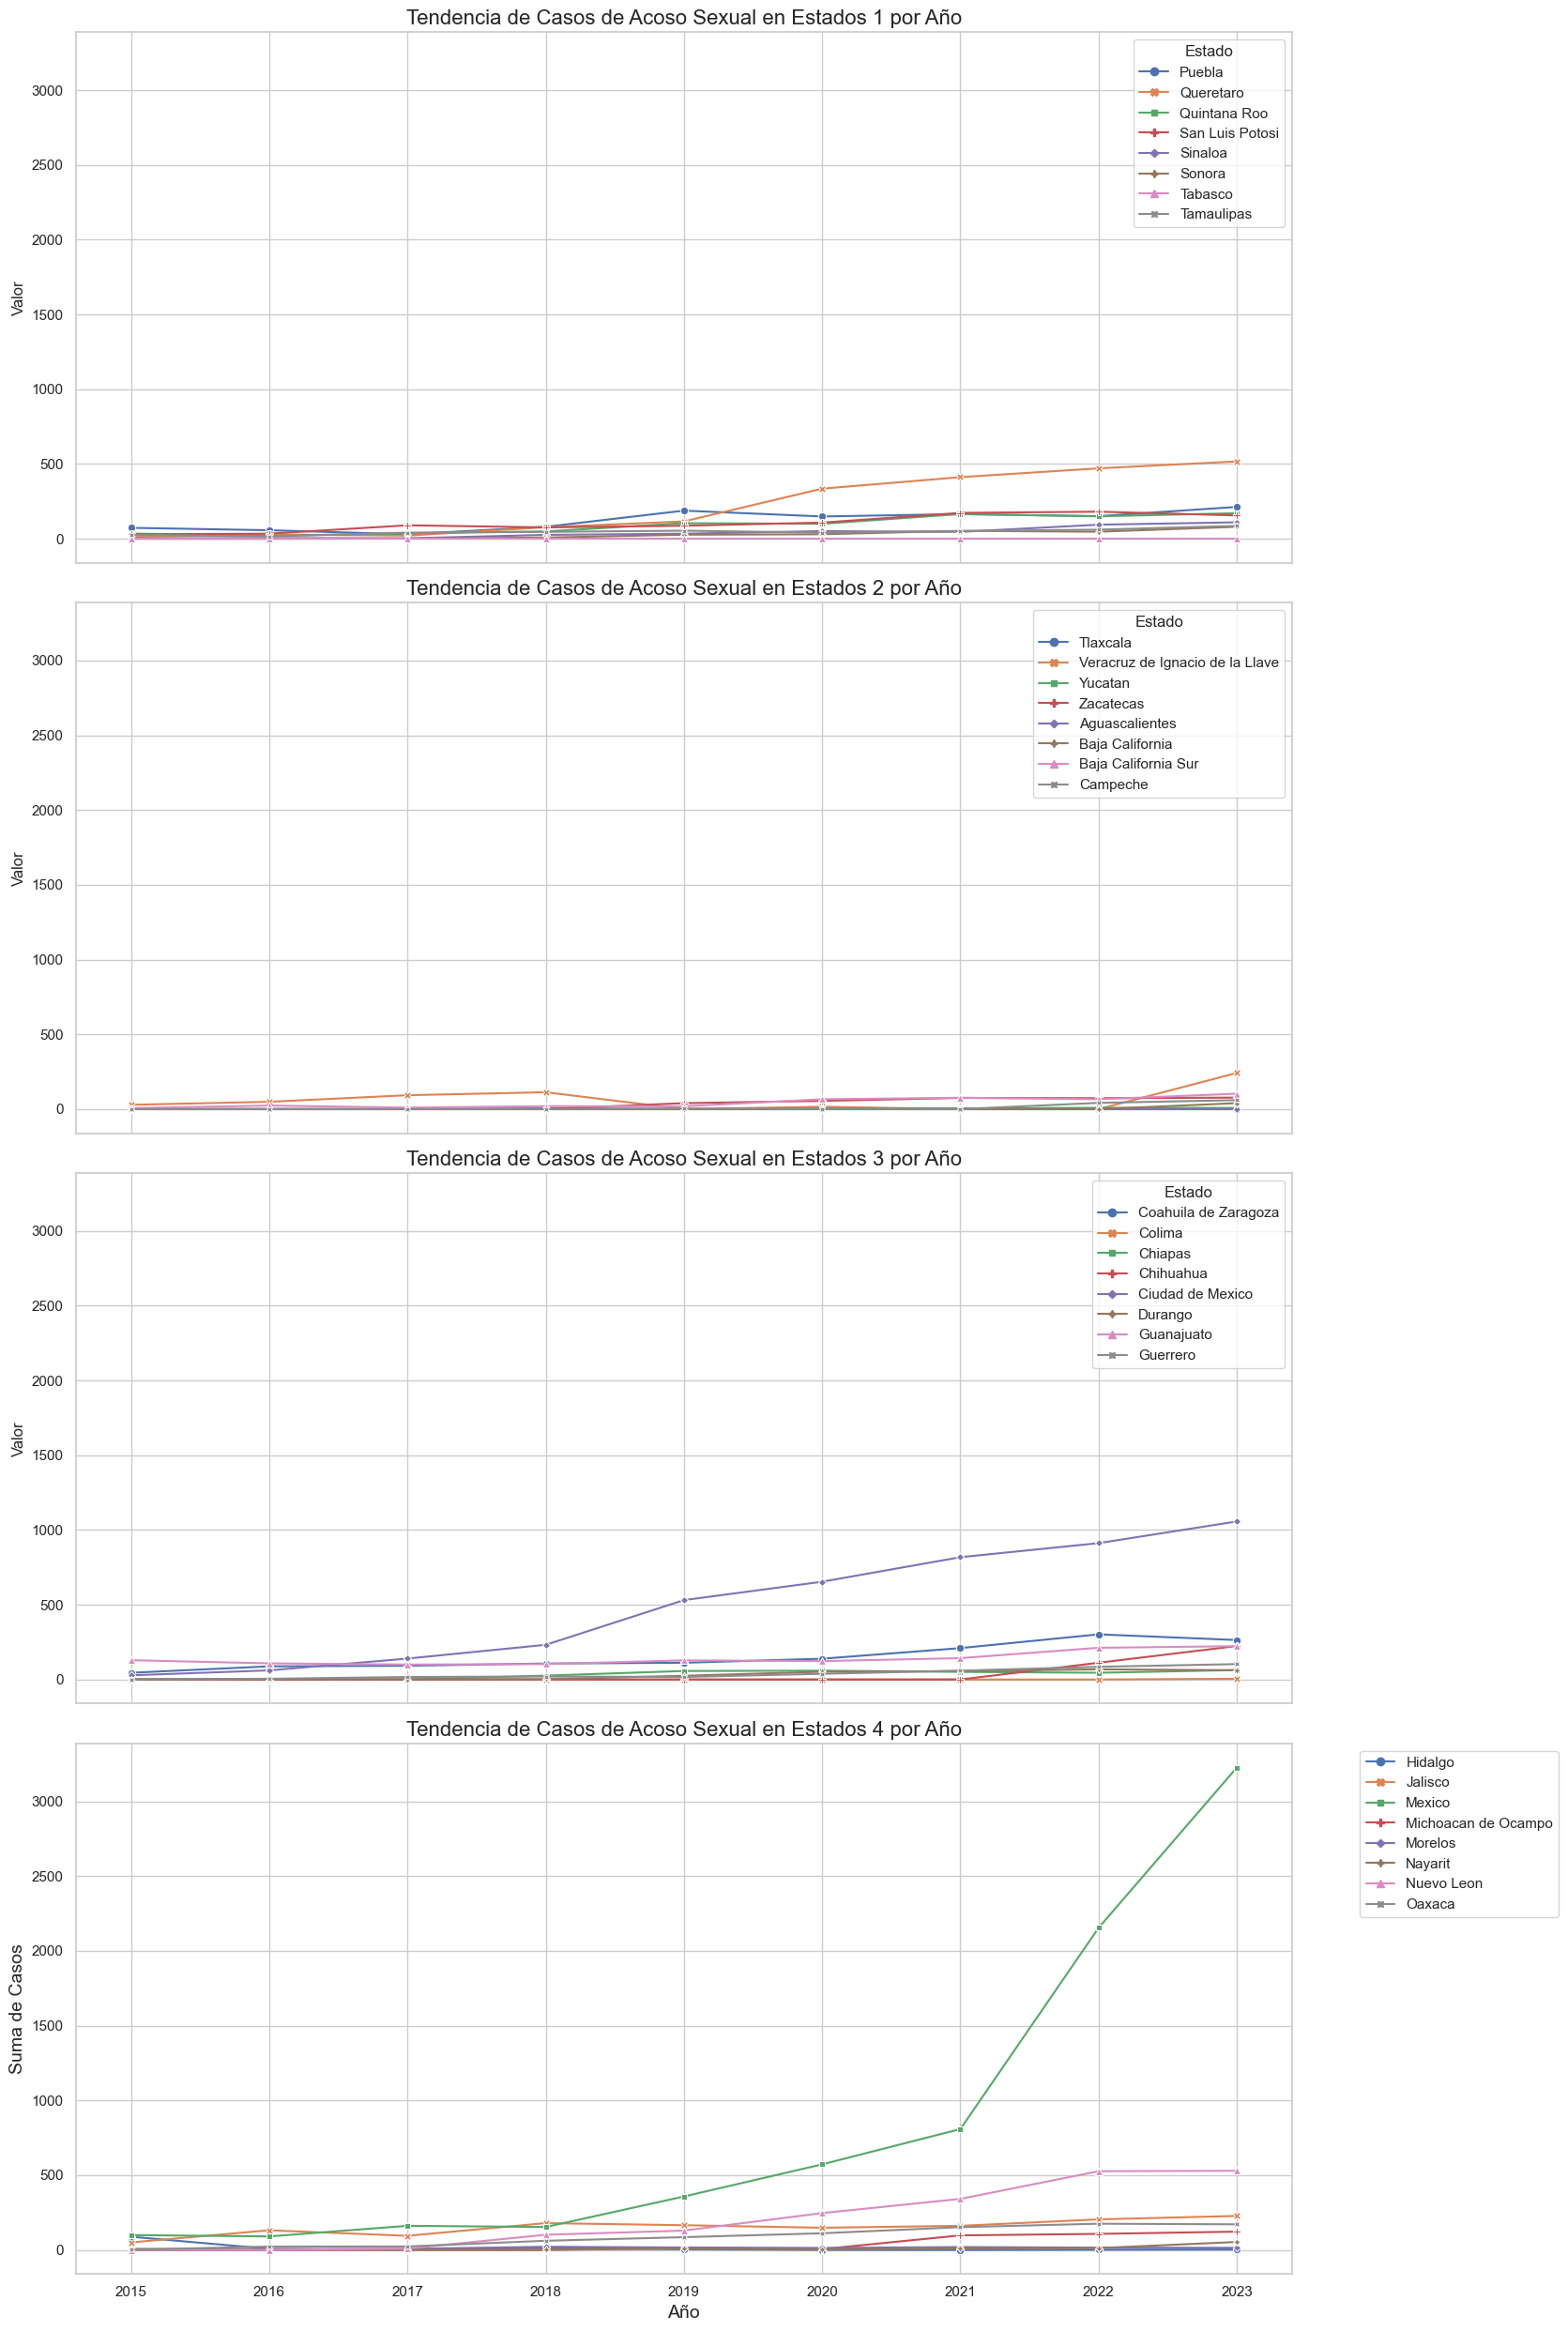

In [37]:
# Initialize the figure with 4 subplots and larger size
fig, axes = plt.subplots(4, 1, figsize=(20, 25), sharex=True, sharey=True)

# Loop through each group of states and create a subplot
for i, states_subset in enumerate(states_grouped):
    ax = axes[i]
    
    # Filter the data to include only the states in the current subset
    df_states_subset = df_acoso_sexual[df_acoso_sexual['Estado'].isin(states_subset)]
    
    # Create a lineplot on the current subplot with different markers and line styles
    sns.lineplot(data=df_states_subset, x='A_o', y='Valor', hue='Estado', estimator=sum, errorbar=None, marker='o', ax=ax, 
                style='Estado', markers=True, dashes=False)
    
    # Add a title to the subplot
    ax.set_title(f'Tendencia de Casos de Acoso Sexual en Estados {i+1} por Año', fontsize=16)

# Add common x and y labels
plt.xlabel('Año', fontsize=14)
plt.ylabel('Suma de Casos', fontsize=14)

# Move legend outside of the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the graphs with a better layout
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5360\2285964001.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


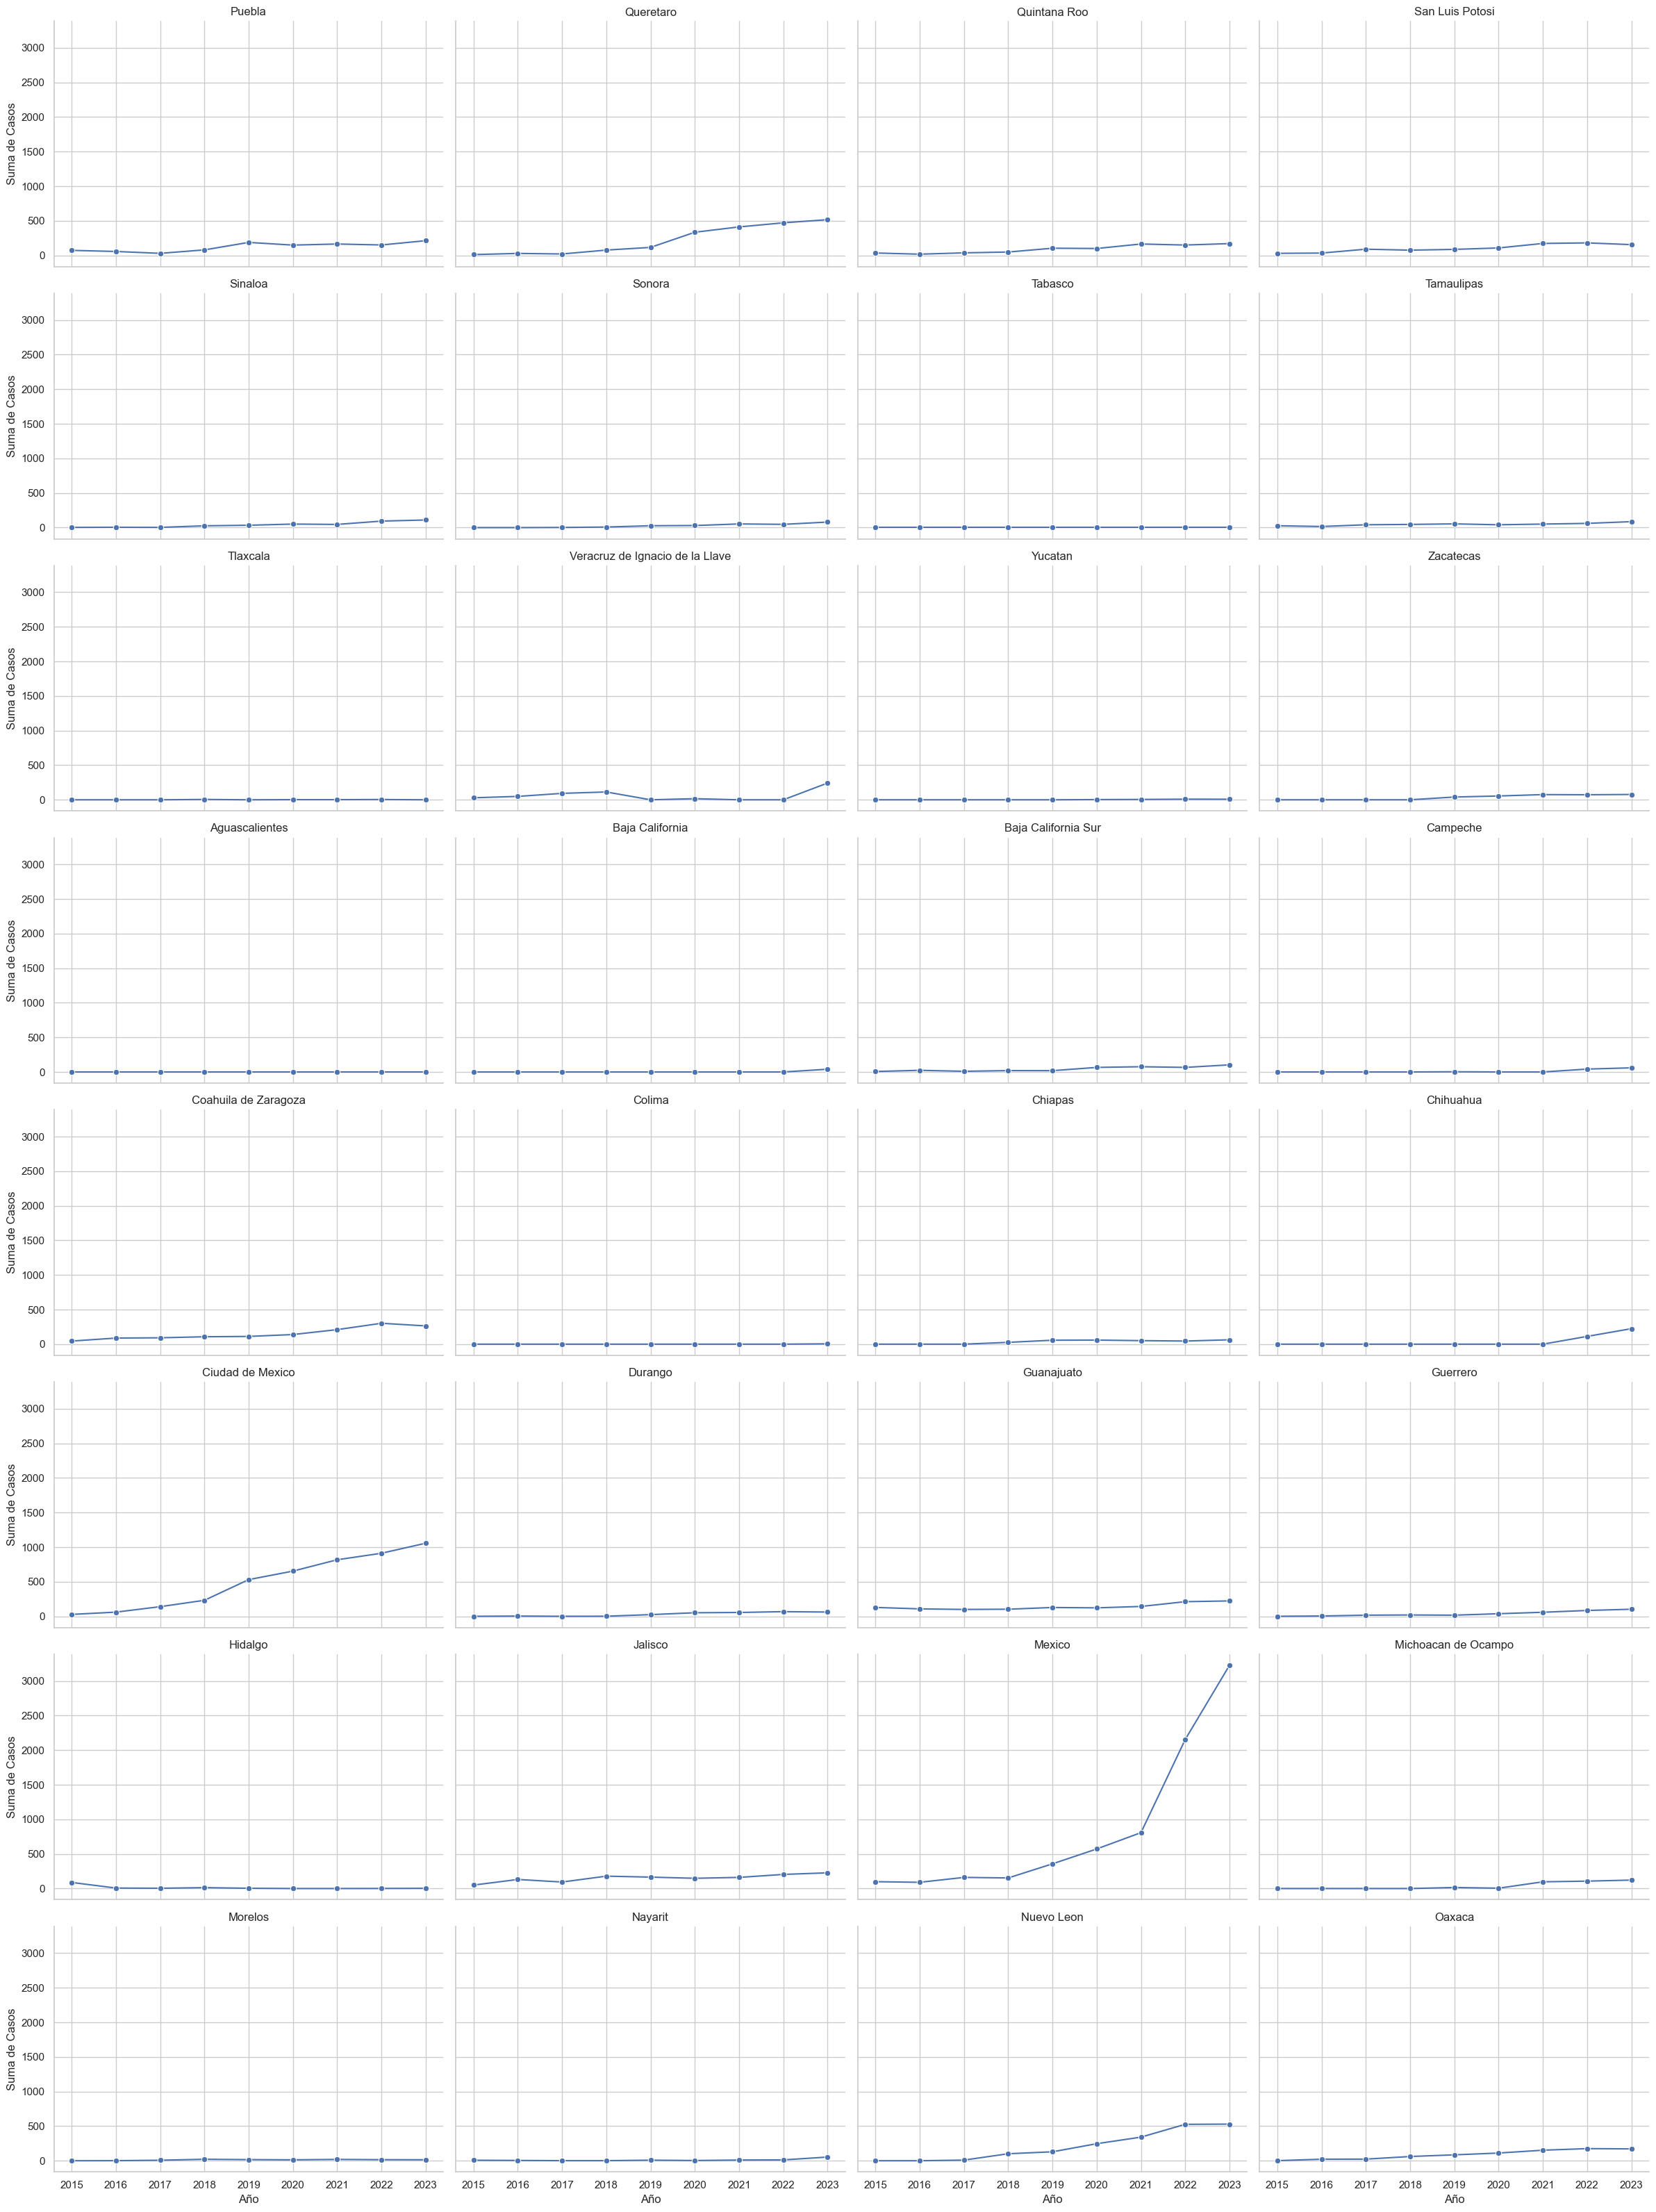

In [38]:
# Inicializar un FacetGrid para crear "small multiples"
# Aquí, col="Estado" significa que queremos un subgráfico para cada estado único
# col_wrap=4 significa que queremos 4 subgráficos por fila
# height=4 y aspect=1.5 definen el tamaño y la forma de cada subgráfico
g = sns.FacetGrid(df_acoso_sexual, col="Estado", col_wrap=4, height=4, aspect=1.5)

# Mapear un gráfico de líneas en cada FacetGrid
# Utilizamos sns.lineplot para dibujar el gráfico de líneas en cada subgráfico
# "A_o" es el eje x y "Valor" es el eje y
# estimator=sum significa que estamos sumando todos los valores para cada año (en lugar de, por ejemplo, calcular un promedio)
# ci=None significa que no queremos mostrar el intervalo de confianza alrededor de la línea de tendencia
g.map(sns.lineplot, "A_o", "Valor", estimator=sum, errorbar=None, marker='o')

# Añadir etiquetas a los ejes y títulos a los subgráficos
# set_axis_labels nos permite etiquetar los ejes x e y
# set_titles añade un título a cada subgráfico basado en el valor de la columna "Estado"
g.set_axis_labels("Año", "Suma de Casos")
g.set_titles("{col_name}")

# Mostrar el gráfico ajustando el diseño para que todo encaje bien
plt.tight_layout()
plt.show()

In [39]:
df_sex_agreson['Tipo_de_abuso'].unique()

array(['Acoso sexual', 'Hostigamiento sexual', 'Violaci�n simple',
       'Violaci�n equiparada',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Abuso sexual'], dtype=object)

In [40]:


# Filter the data to focus only on "Hostigamiento sexual"
df_hostigamiento_sexual = df_sex_agreson[df_sex_agreson['Tipo_de_abuso'] == 'Violacion simple']
# Inicializar un FacetGrid para crear "small multiples" (múltiples subgráficos).
# El argumento 'col' indica que queremos un subgráfico por cada estado.
# 'col_wrap=4' establece que habrá 4 subgráficos por fila.
# 'height=4' y 'aspect=1.5' controlan el tamaño de cada subgráfico.
g = sns.FacetGrid(df_hostigamiento_sexual, col="Estado", col_wrap=4, height=4, aspect=1.5)

# Mapear un gráfico de líneas en cada FacetGrid.
# El primer argumento indica el eje x ("A_o" para año), y el segundo es el eje y ("Valor").
# 'estimator=sum' suma todos los valores para cada año.
# 'ci=None' desactiva el intervalo de confianza alrededor de la línea.
# 'marker='o'' usa círculos como marcadores en la línea.
g.map(sns.lineplot, "A_o", "Valor", estimator=sum, errorbar=None, marker='o')

# Añadir títulos y etiquetas a los ejes.
# 'set_axis_labels' añade etiquetas a los ejes x e y.
# 'set_titles' añade un título a cada subgráfico, usando el nombre del estado.
g.set_axis_labels("Año", "Suma de Casos")
g.set_titles("{col_name}")

# Añadir un título general a toda la figura
g.fig.suptitle('Tendencias de Hostigamiento Sexual por Estado y Año', y=1.02)


# Mostrar el gráfico.
# 'tight_layout()' ajusta automáticamente los subgráficos para que no se superpongan.
plt.tight_layout()
plt.show()


ValueError: Number of rows must be a positive integer, not 0

<Figure size 2400x0 with 0 Axes>

In [ ]:
df_sex_agreson['Tipo_de_abuso'].unique()

array(['Acoso sexual', 'Hostigamiento sexual', 'Violacion simple',
       'Violacion equiparada',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Abuso sexual'], dtype=object)

c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19688\931549186.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


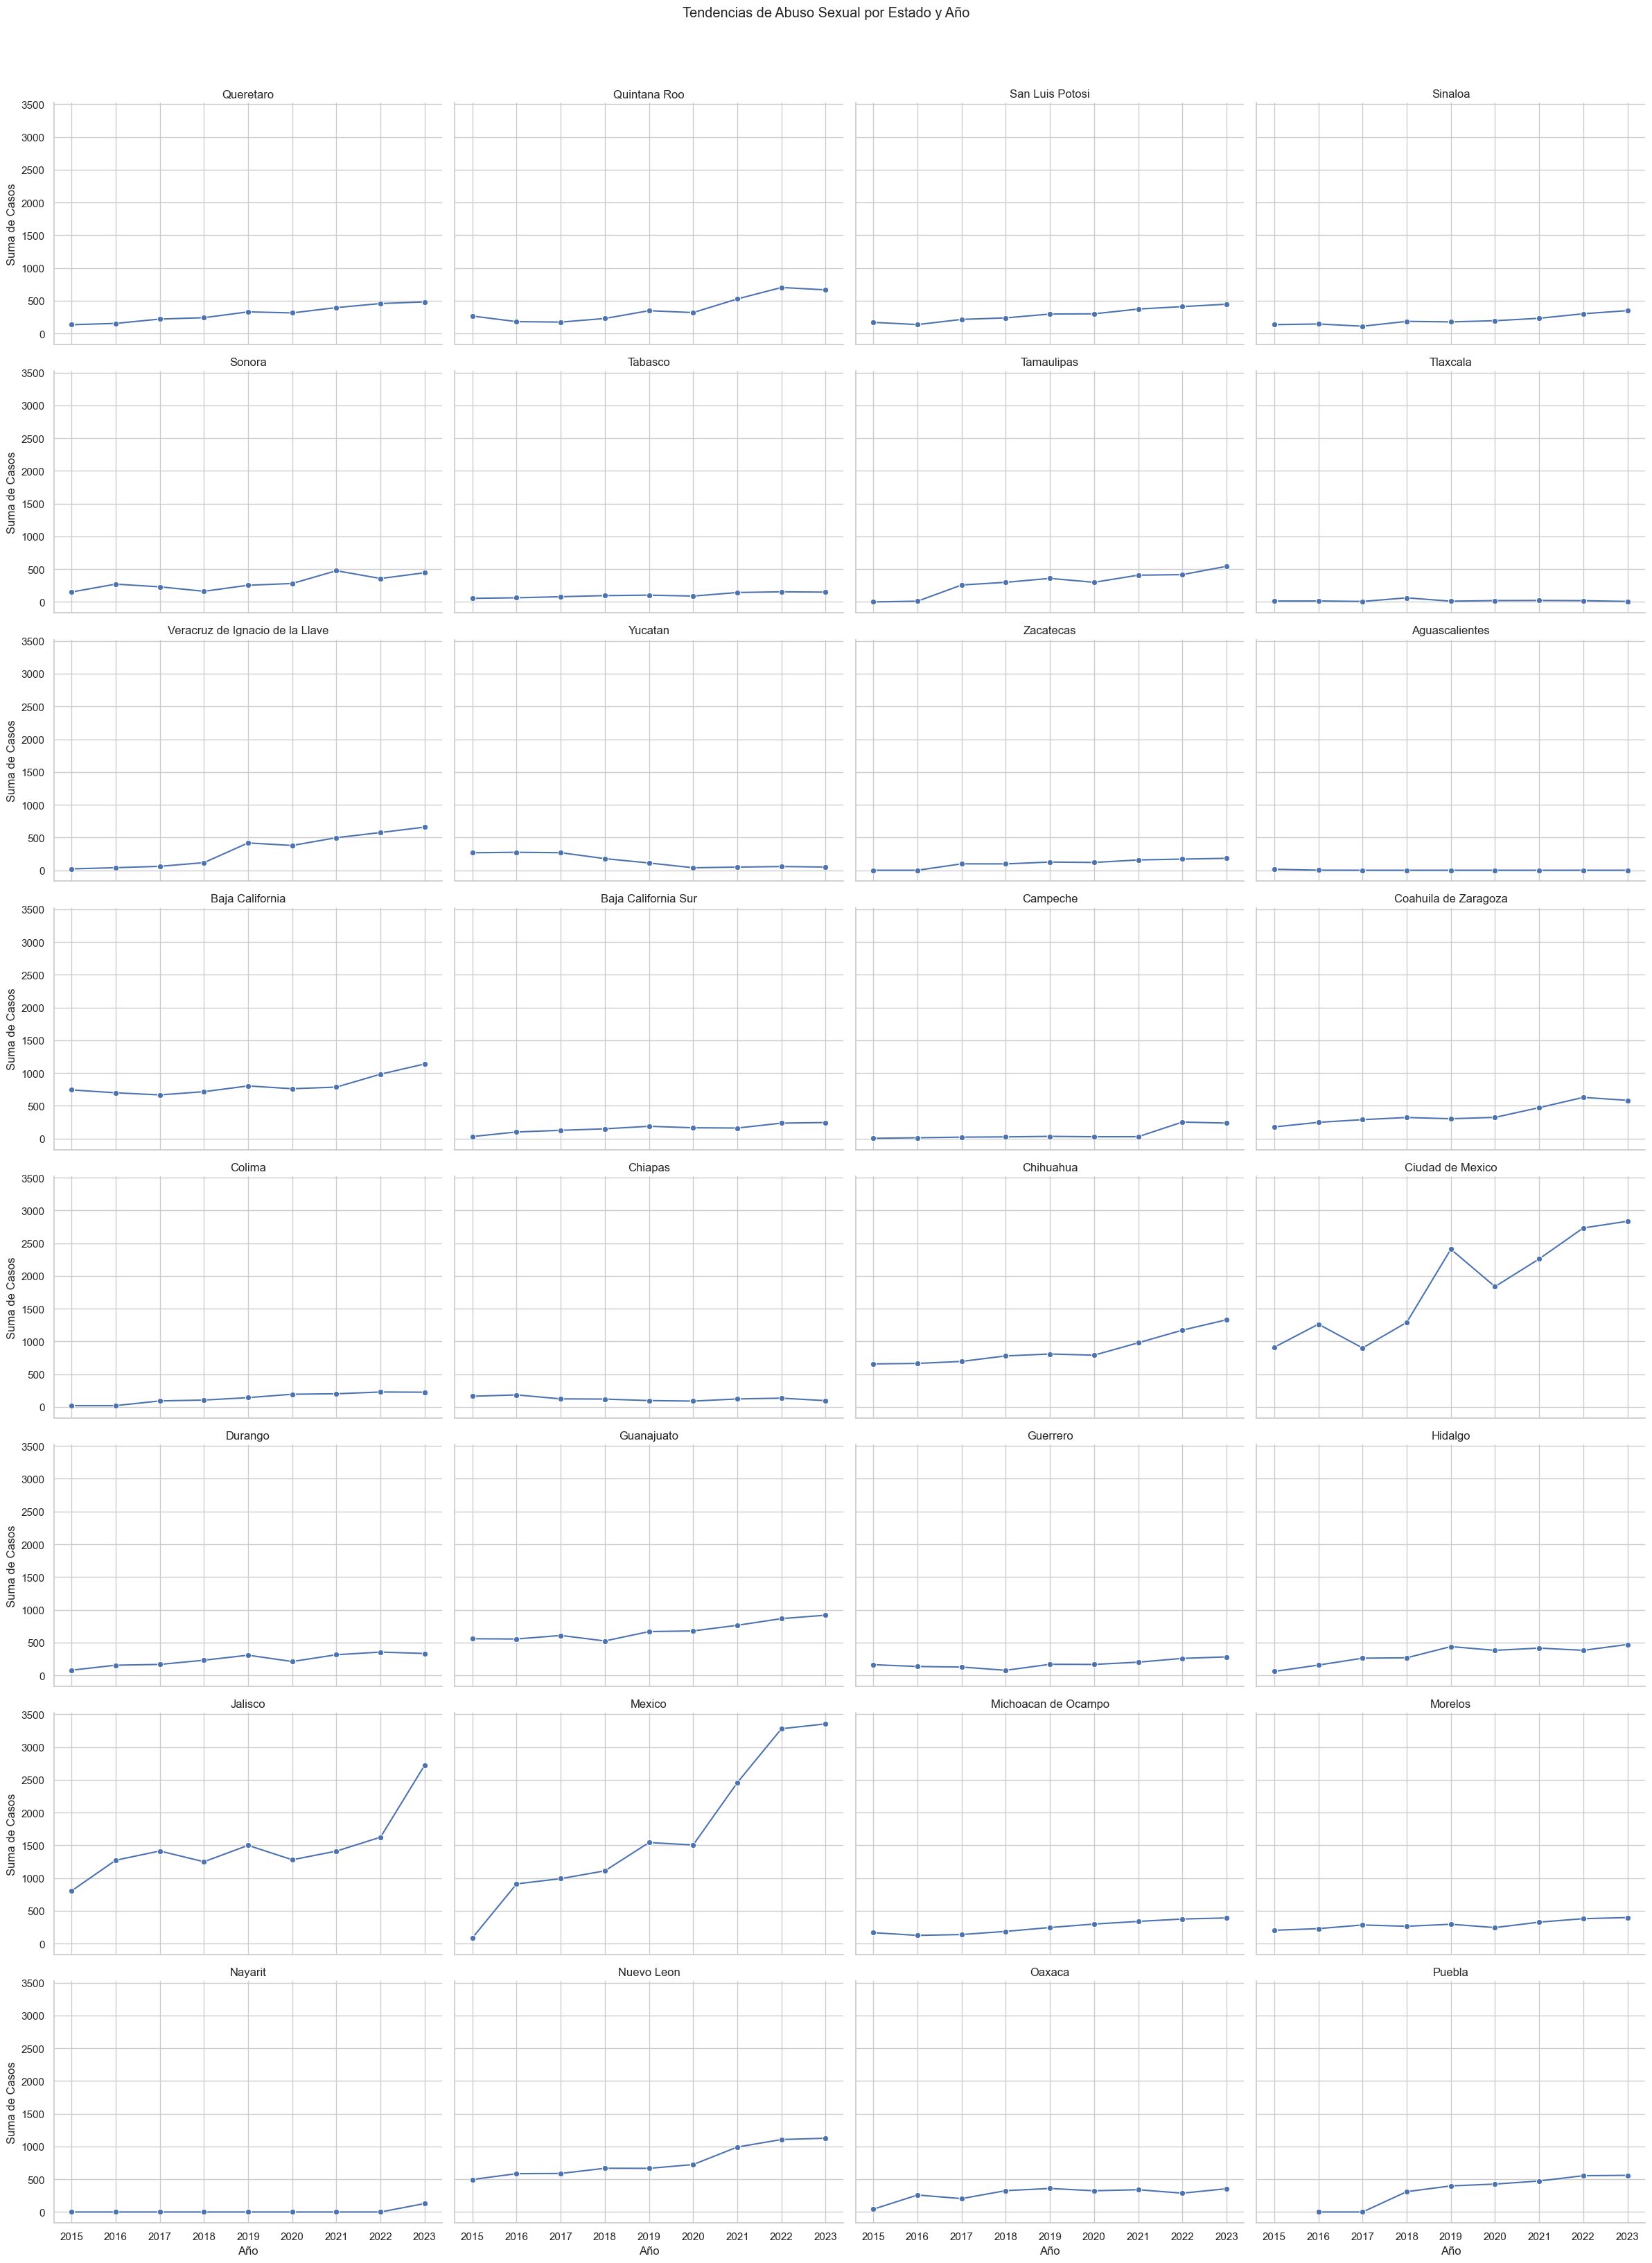

In [ ]:
# Filter the data to focus only on "Hostigamiento sexual"
df_Abuso_sexual = df_sex_agreson[df_sex_agreson['Tipo_de_abuso'] == 'Abuso sexual']
# Inicializar un FacetGrid para crear "small multiples" (múltiples subgráficos).
# El argumento 'col' indica que queremos un subgráfico por cada estado.
# 'col_wrap=4' establece que habrá 4 subgráficos por fila.
# 'height=4' y 'aspect=1.5' controlan el tamaño de cada subgráfico.
g = sns.FacetGrid(df_Abuso_sexual, col="Estado", col_wrap=4, height=4, aspect=1.5)

# Mapear un gráfico de líneas en cada FacetGrid.
# El primer argumento indica el eje x ("A_o" para año), y el segundo es el eje y ("Valor").
# 'estimator=sum' suma todos los valores para cada año.
# 'ci=None' desactiva el intervalo de confianza alrededor de la línea.
# 'marker='o'' usa círculos como marcadores en la línea.
g.map(sns.lineplot, "A_o", "Valor", estimator=sum, errorbar=None, marker='o')

# Añadir títulos y etiquetas a los ejes.
# 'set_axis_labels' añade etiquetas a los ejes x e y.
# 'set_titles' añade un título a cada subgráfico, usando el nombre del estado.
g.set_axis_labels("Año", "Suma de Casos")
g.set_titles("{col_name}")

# Añadir un título general a toda la figura
g.fig.suptitle('Tendencias de Abuso Sexual por Estado y Año', y=1.02)


# Mostrar el gráfico.
# 'tight_layout()' ajusta automáticamente los subgráficos para que no se superpongan.
plt.tight_layout()
plt.show()


-- OKay los de jalisco no presentan acoso, directamente se van a la abuso, esto sera cierto o sera mera coincidencia

In [ ]:
df_sex_agreson['Tipo_de_abuso'].unique()

array(['Acoso sexual', 'Hostigamiento sexual', 'Violacion simple',
       'Violacion equiparada',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Abuso sexual'], dtype=object)

c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19688\2823058886.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


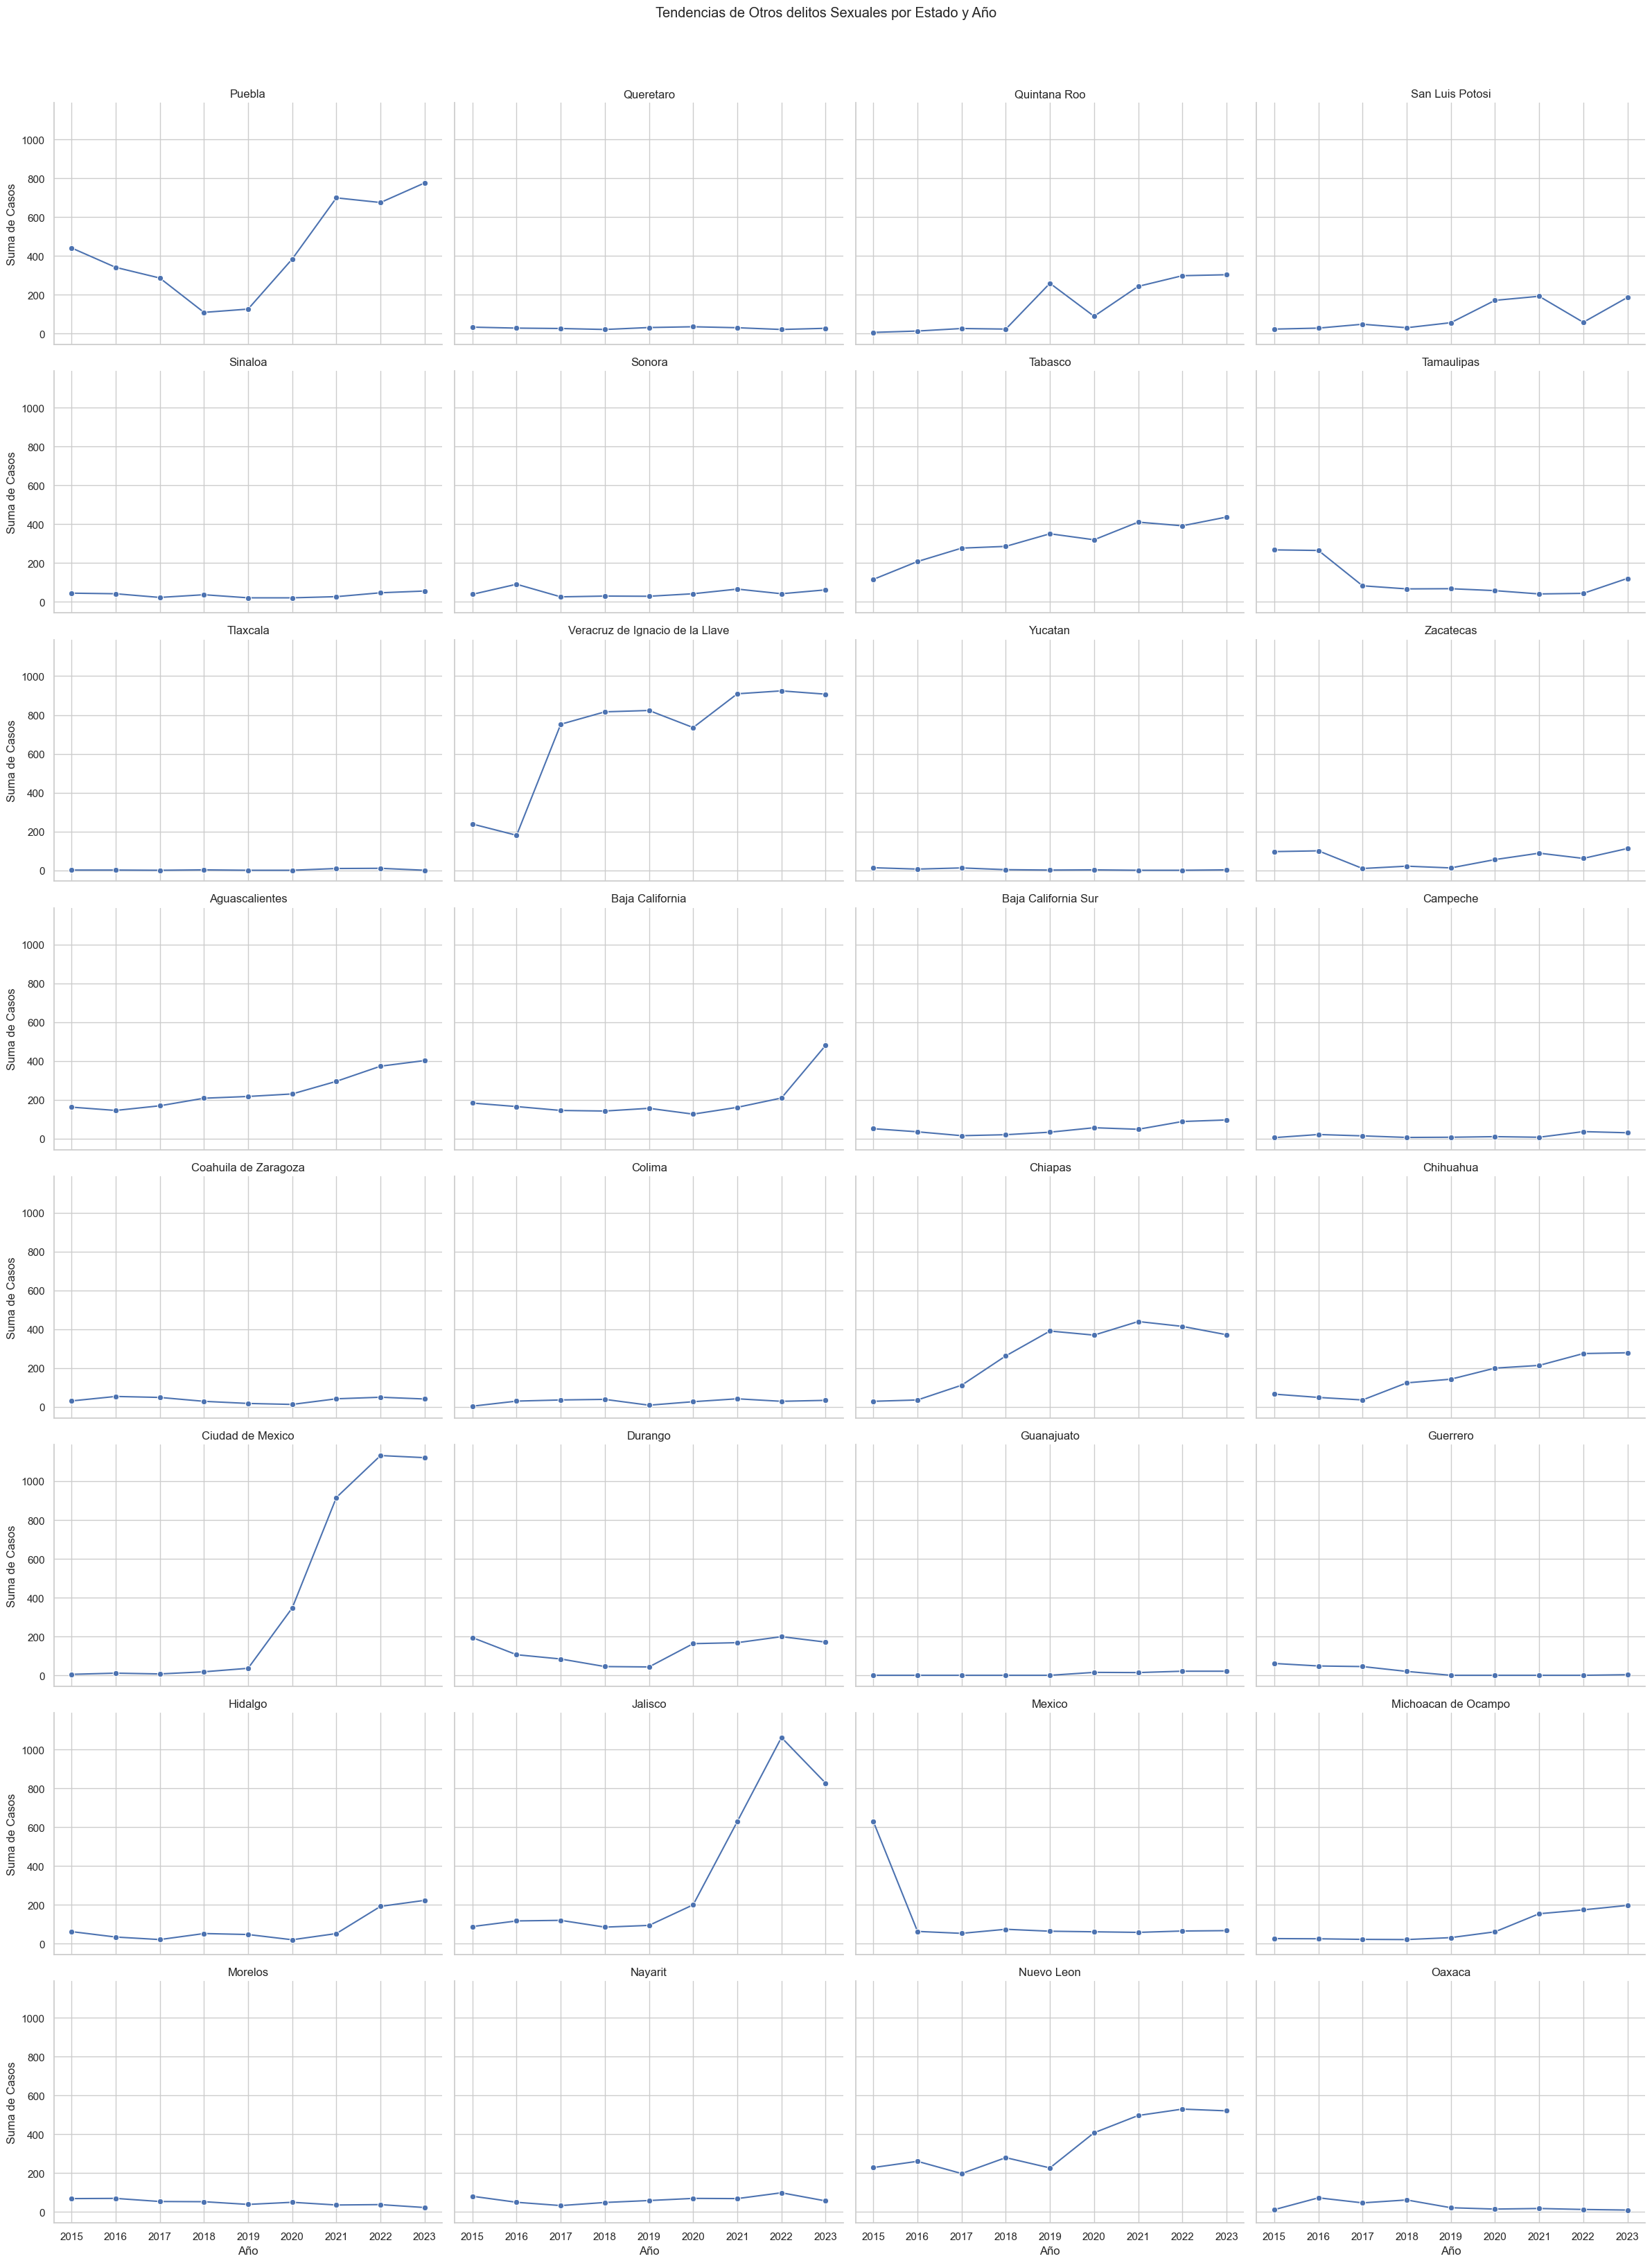

In [ ]:
# Filter the data to focus only on "Hostigamiento sexual"
df_otros_delitos_sexuales = df_sex_agreson[df_sex_agreson['Tipo_de_abuso'] == 'Otros delitos que atentan contra la libertad y la seguridad sexual']
# Inicializar un FacetGrid para crear "small multiples" (múltiples subgráficos).
# El argumento 'col' indica que queremos un subgráfico por cada estado.
# 'col_wrap=4' establece que habrá 4 subgráficos por fila.
# 'height=4' y 'aspect=1.5' controlan el tamaño de cada subgráfico.
g = sns.FacetGrid(df_otros_delitos_sexuales, col="Estado", col_wrap=4, height=4, aspect=1.5)

# Mapear un gráfico de líneas en cada FacetGrid.
# El primer argumento indica el eje x ("A_o" para año), y el segundo es el eje y ("Valor").
# 'estimator=sum' suma todos los valores para cada año.
# 'ci=None' desactiva el intervalo de confianza alrededor de la línea.
# 'marker='o'' usa círculos como marcadores en la línea.
g.map(sns.lineplot, "A_o", "Valor", estimator=sum, errorbar=None, marker='o')

# Añadir títulos y etiquetas a los ejes.
# 'set_axis_labels' añade etiquetas a los ejes x e y.
# 'set_titles' añade un título a cada subgráfico, usando el nombre del estado.
g.set_axis_labels("Año", "Suma de Casos")
g.set_titles("{col_name}")

# Añadir un título general a toda la figura
g.fig.suptitle('Tendencias de Otros delitos Sexuales por Estado y Año', y=1.02)


# Mostrar el gráfico.
# 'tight_layout()' ajusta automáticamente los subgráficos para que no se superpongan.
plt.tight_layout()
plt.show()

# Jalisco ASK

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19688\2245820359.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_jalisco, x='A_o', y='Valor', hue='Tipo_de_abuso', estimator=sum, ci=None, marker='o')


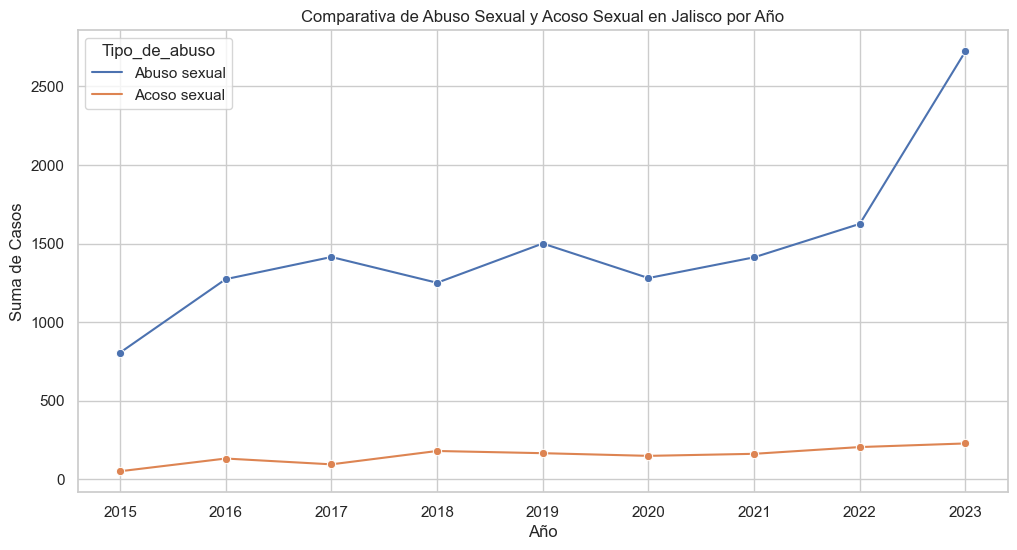

In [ ]:
# Reload the dataset again
df = df_sex_agreson

# Filter the data to focus only on Jalisco and the two types of abuse ("Abuso Sexual" and "Acoso Sexual")
# Aquí estamos filtrando el DataFrame para quedarnos solo con los datos que pertenecen al estado de Jalisco 
# y que son de los tipos "Abuso Sexual" o "Acoso Sexual".
df_jalisco = df[(df['Estado'] == 'Jalisco') & (df['Tipo_de_abuso'].isin(['Abuso sexual', 'Acoso sexual']))]

# Create the lineplot
# Estamos configurando el tamaño del gráfico. El tamaño se define como ancho x alto en pulgadas.
plt.figure(figsize=(12, 6))

# Aquí creamos el gráfico de líneas usando la función lineplot de Seaborn.
# - data: es el DataFrame que contiene los datos a graficar.
# - x: es la columna que irá en el eje X, en este caso, el año ('A_o').
# - y: es la columna que irá en el eje Y, en este caso, 'Valor', que representa la suma de casos.
# - hue: este argumento nos permite diferenciar las líneas por tipo de abuso.
# - estimator: estamos usando la suma para agregar los datos.
# - ci: estamos desactivando el intervalo de confianza.
# - marker: estamos usando un marcador de círculo para cada punto en la línea.
sns.lineplot(data=df_jalisco, x='A_o', y='Valor', hue='Tipo_de_abuso', estimator=sum, ci=None, marker='o')

# Add titles and labels
# Aquí estamos añadiendo un título al gráfico y etiquetas a los ejes X y Y.
plt.title('Comparativa de Abuso Sexual y Acoso Sexual en Jalisco por Año')
plt.xlabel('Año')
plt.ylabel('Suma de Casos')

# Show the graph
# Finalmente, mostramos el gráfico.
plt.show()


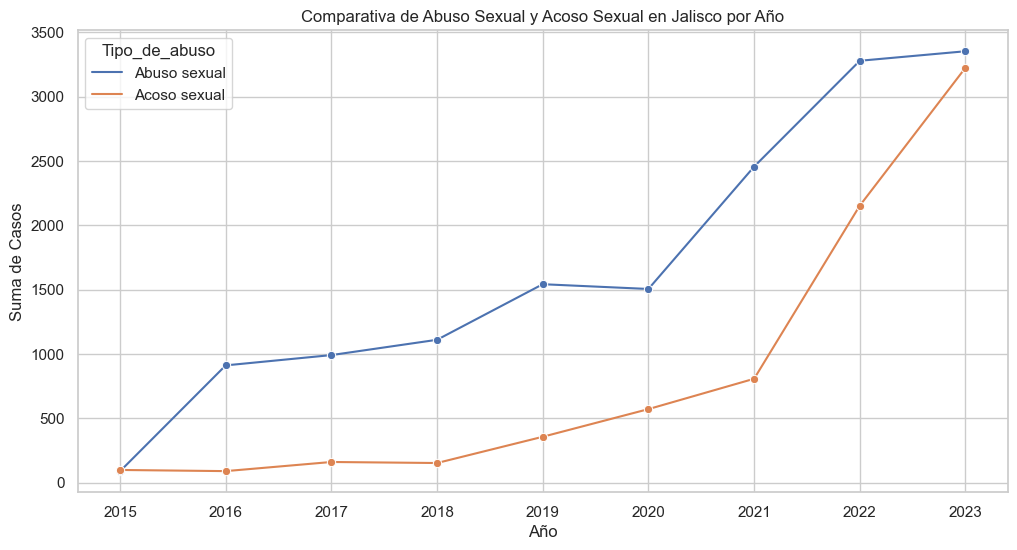

In [ ]:
# Reload the dataset again
df = df_sex_agreson

# Filter the data to focus only on Jalisco and the two types of abuse ("Abuso Sexual" and "Acoso Sexual")
df_jalisco = df[(df['Estado'] == 'Mexico') & (df['Tipo_de_abuso'].isin(['Abuso sexual', 'Acoso sexual']))]

# Create the lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_jalisco, x='A_o', y='Valor', hue='Tipo_de_abuso', estimator=sum, errorbar=None, marker='o')

# Add titles and labels
plt.title('Comparativa de Abuso Sexual y Acoso Sexual en Jalisco por Año')
plt.xlabel('Año')
plt.ylabel('Suma de Casos')

# Show the graph
plt.show()

c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19688\2512898072.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


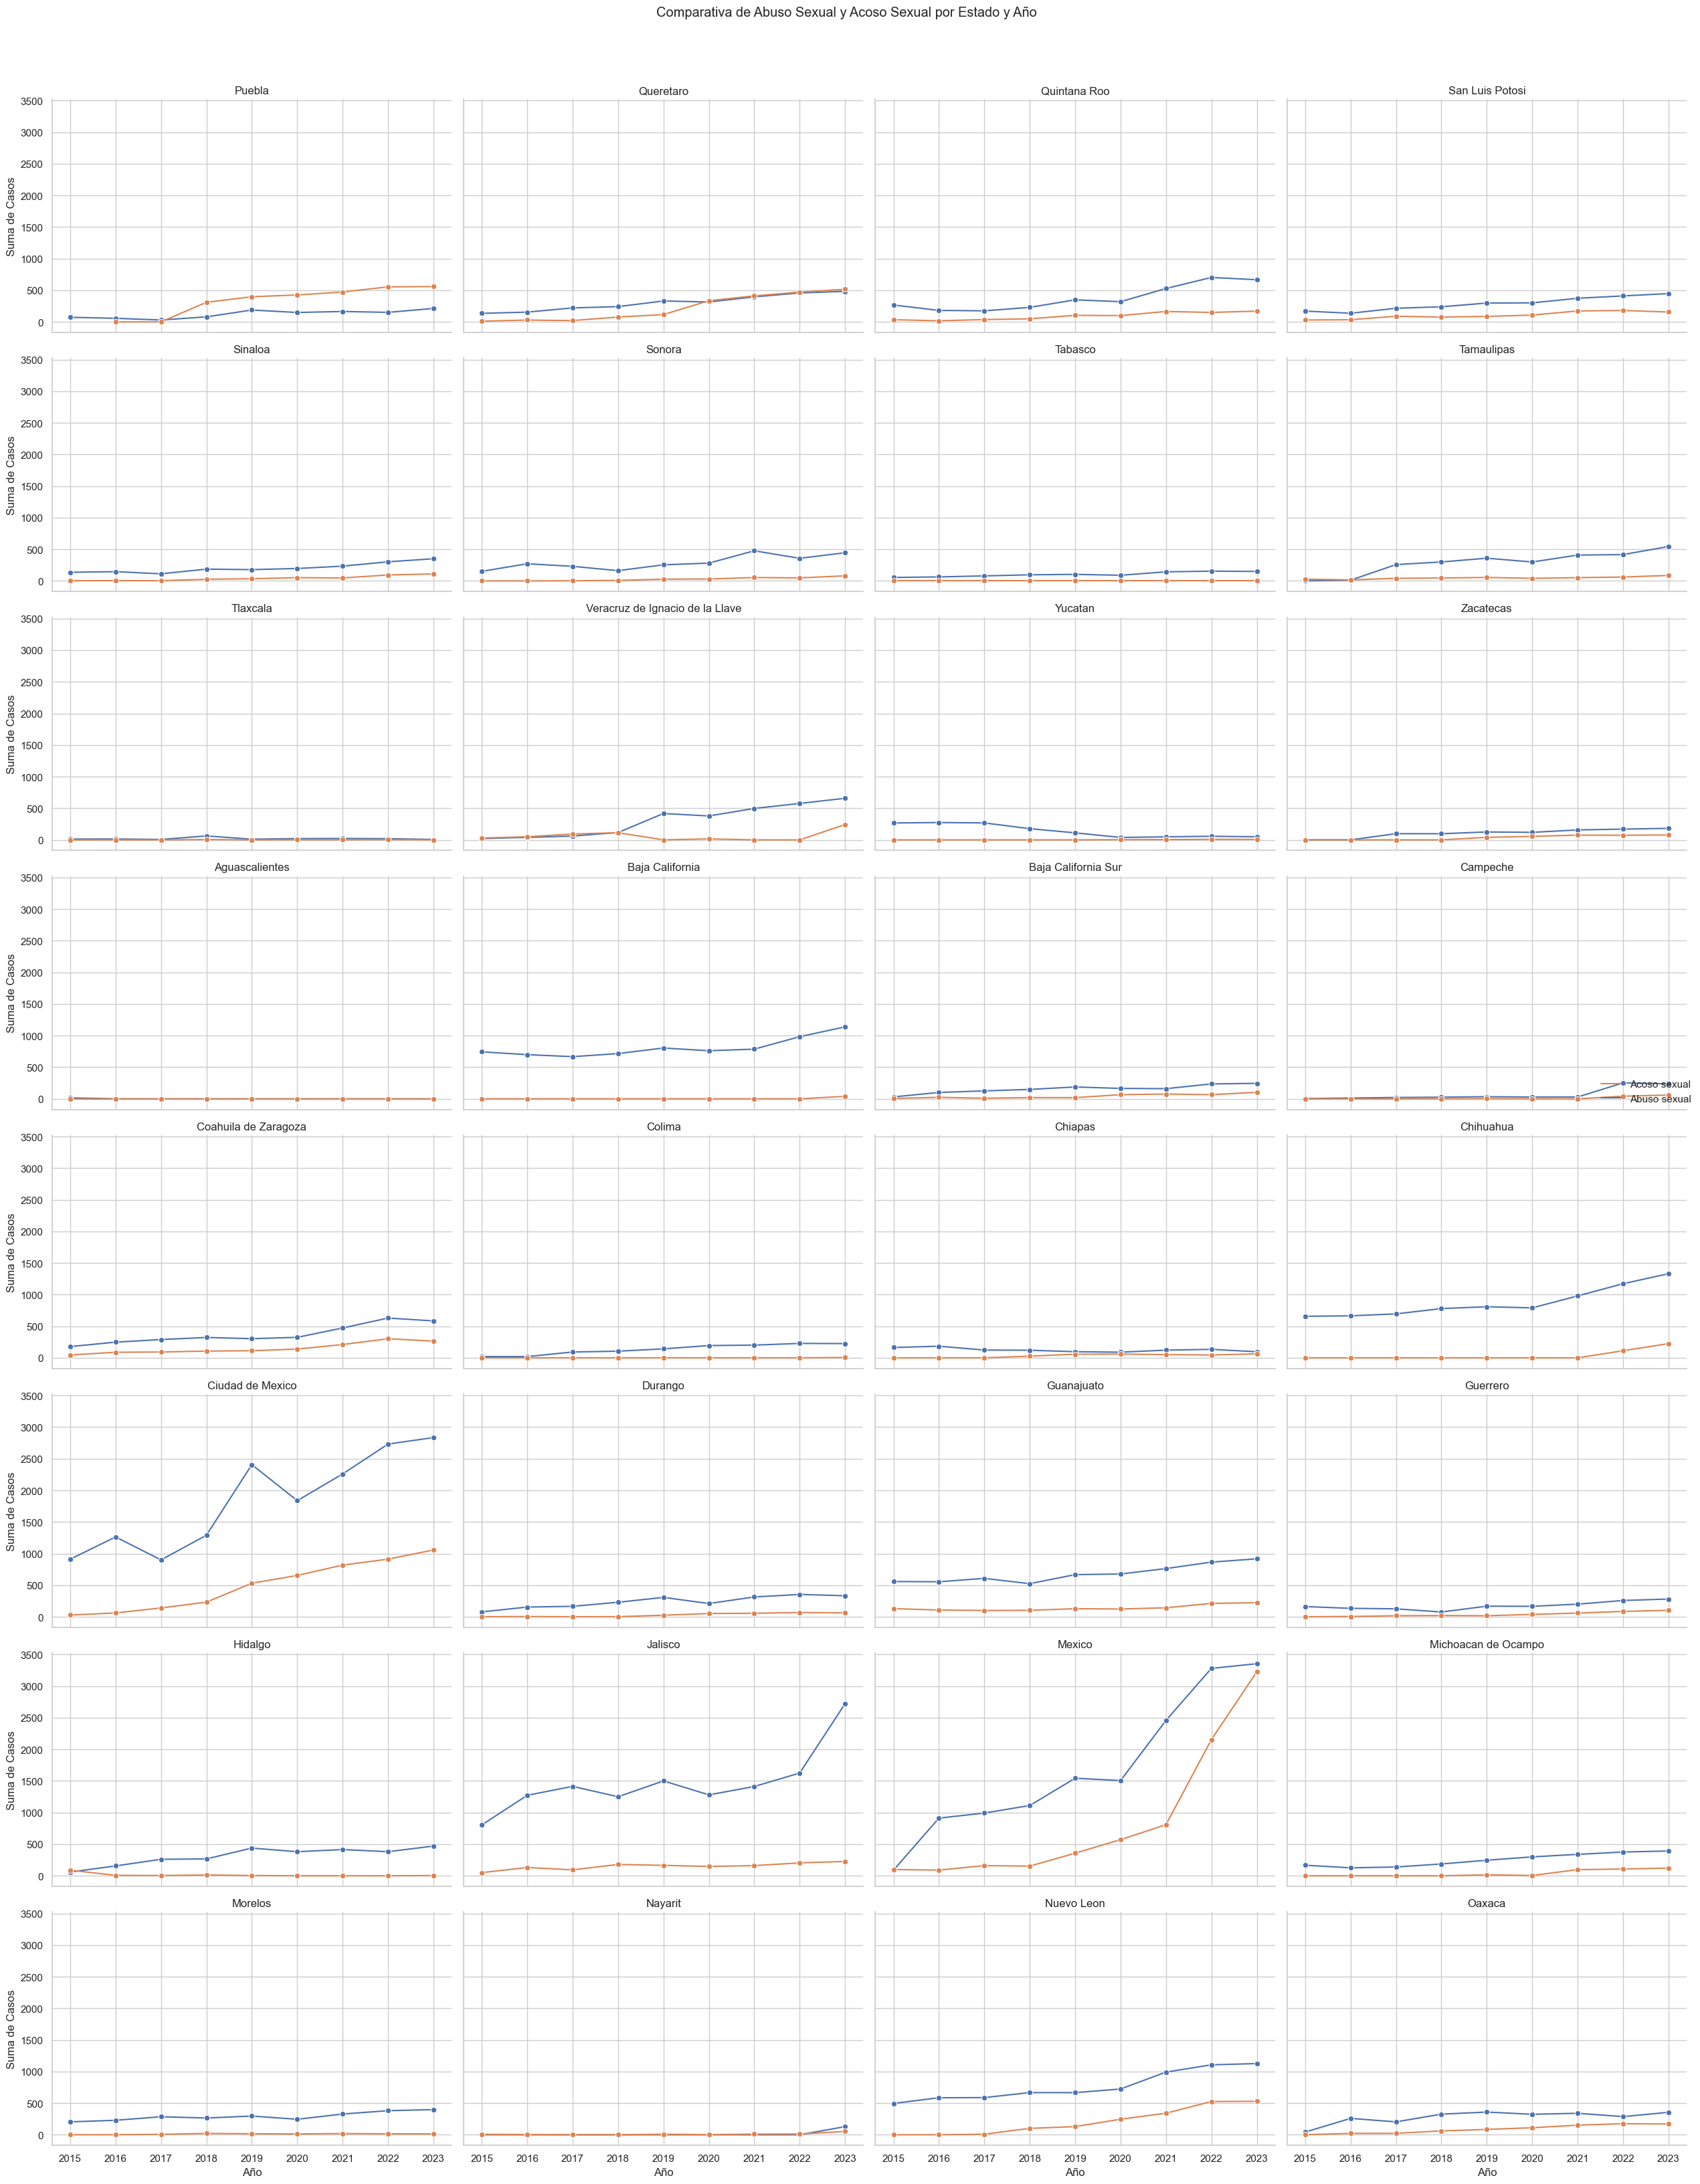

In [ ]:
#df_comparativo = df['Tipo_de_abuso'].isin(['Abuso sexual', 'Acoso sexual'])
df_comparativo = df[df['Tipo_de_abuso'].isin(['Abuso sexual', 'Acoso sexual'])]


# Trying again to create the Small Multiples for Abuso Sexual and Acoso Sexual across all states
# Initialize a FacetGrid to create small multiples
g = sns.FacetGrid(df_comparativo, col="Estado", col_wrap=4, height=4, aspect=1.5)

# Map a lineplot onto each FacetGrid
g.map_dataframe(sns.lineplot, x="A_o", y="Valor", hue="Tipo_de_abuso", estimator=sum, errorbar=None, marker='o')

# Add titles and labels
g.set_axis_labels("Año", "Suma de Casos")
g.set_titles("{col_name}")
g.add_legend()

# Add a general title
g.fig.suptitle('Comparativa de Abuso Sexual y Acoso Sexual por Estado y Año', y=1.02)

# Show the plot
plt.tight_layout()
plt.show()


c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19688\3995153109.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


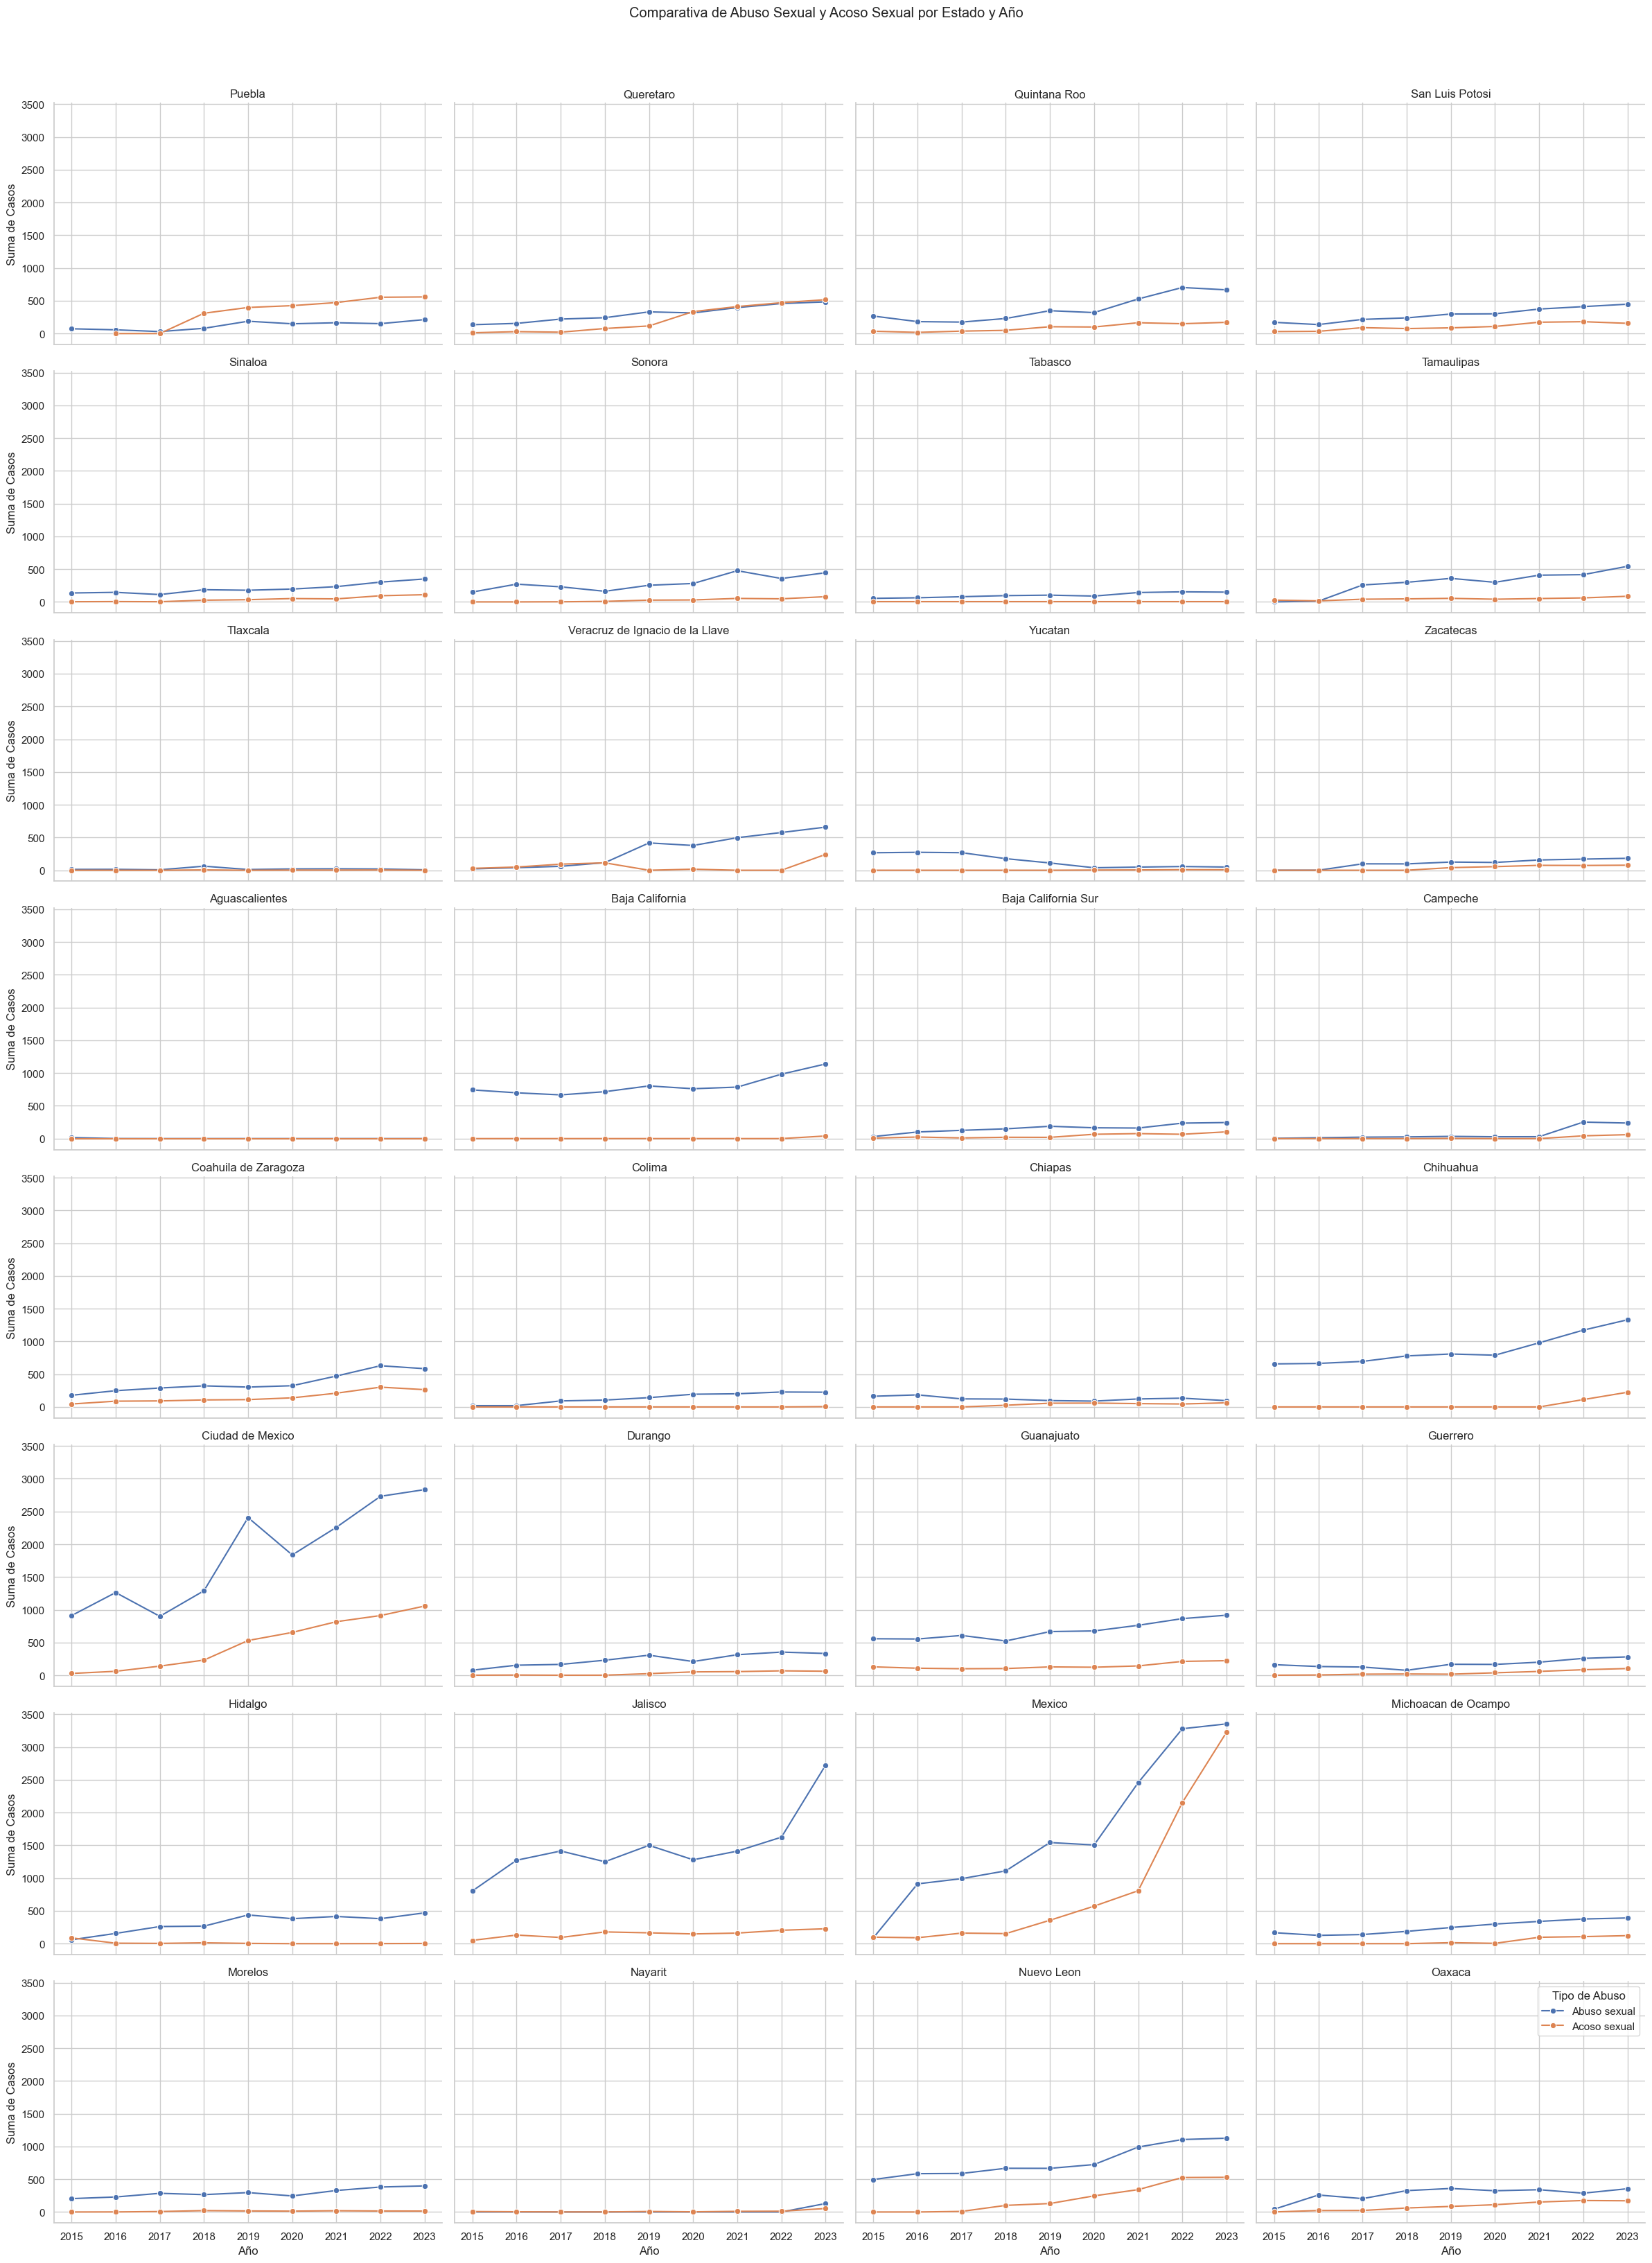

In [ ]:
# Trying again to add legends to the small multiples

# Initialize a FacetGrid to create small multiples, now with a legend outside the grid
g = sns.FacetGrid(df_comparativo, col="Estado", col_wrap=4, height=4, aspect=1.5)
g = g.map_dataframe(sns.lineplot, x="A_o", y="Valor", hue="Tipo_de_abuso", estimator=sum, errorbar=None, marker='o')

# Add titles and labels
g.set_axis_labels("Año", "Suma de Casos")
g.set_titles("{col_name}")

# Add a general title
g.fig.suptitle('Comparativa de Abuso Sexual y Acoso Sexual por Estado y Año', y=1.02)

# Add legend manually
plt.legend(title='Tipo de Abuso', labels=['Abuso sexual', 'Acoso sexual'])

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# First, let's create a pivot table to better structure the data for correlation calculation
pivot_df = df_sex_agreson.pivot_table(values='Valor', index=['Estado', 'A_o'], columns='Tipo_de_abuso', aggfunc=sum).reset_index()

# Now, let's calculate the correlation coefficient for each state
correlation_by_state = {}
for state in pivot_df['Estado'].unique():
    subset_df = pivot_df[pivot_df['Estado'] == state]
    correlation_value = subset_df['Abuso sexual'].corr(subset_df['Acoso sexual'])
    correlation_by_state[state] = correlation_value

correlation_by_state_df = pd.DataFrame(list(correlation_by_state.items()), columns=['Estado', 'Coeficiente de Correlación']).sort_values(by='Coeficiente de Correlación', ascending=False)

correlation_by_state_df.head(32)  # Showing the top 10 states with the highest correlation coefficients


Estado  Coeficiente de Correlación
7              Coahuila de Zaragoza                    0.993690
24                          Sinaloa                    0.978814
18                       Nuevo Leon                    0.978574
17                          Nayarit                    0.971187
3                          Campeche                    0.968941
6                  Ciudad de Mexico                    0.941914
23                  San Luis Potosi                    0.939385
27                       Tamaulipas                    0.936403
21                        Queretaro                    0.933144
10                       Guanajuato                    0.926970
22                     Quintana Roo                    0.926427
5                         Chihuahua                    0.898472
20                           Puebla                    0.897065
14                           Mexico                    0.893026
15              Michoacan de Ocampo                    0.884476
25                           Sonora                    0.878108
11                         Guerrero                    0.864771
31                        Zacatecas                    0.844306
28                         Tlaxcala                    0.829291
1                   Baja California                    0.804196
9                           Durango                    0.797285
13                          Jalisco                    0.761717
2               Baja California Sur                    0.735067
19                           Oaxaca                    0.685019
16                          Morelos                    0.563775
8                            Colima                    0.405390
29  Veracruz de Ignacio de la Llave                    0.126446
12                          Hidalgo                   -0.744249
30                          Yucatan                   -0.753605
4                           Chiapas                   -0.803731
0                    Aguascalientes                         NaN
26                          Tabasco                         NaN